# **Important Libraries**

In [ ]:
!pip install googletrans==4.0.0rc1
!pip install langid
!pip install geopandas
!pip install -U textblob
!python -m textblob.download_corpora lite
!pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Finished.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.de

In [ ]:
# (for mathematical operations) used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
import numpy as np
import pandas as pd

#libararies to preprocessing the data
import nltk
from nltk.corpus import stopwords
import re 
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# For translate the values
from googletrans import Translator
# For Detect the language
import langid

# for imputing missing values using KNN
from sklearn.impute import KNNImputer

# For conver categorical data to numerical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# for visulaizate the data 
import matplotlib.pyplot as plt
# import plotly.express as px
import seaborn as sns

# provides a series of visualisations to understand the presence and distribution of missing data within data. we can identify where missing values occur, the extent of the missingness and whether any of the missing values are correlated with each other.
import missingno as msno

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# data manipulation utility libraries
from distutils.util import strtobool

# For Hypothises
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# select the best parameters from the listed hyperparameters.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR

from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor



from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error


import tensorflow as tf
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap


from scipy import stats
from scipy.stats import norm

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from textblob import TextBlob

# saves from multiple prints and display statements,
# will let you see multiple outputs in the same cell
# allow display of multiple outputs by running one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Ignore the warning
import warnings
warnings.filterwarnings("ignore")

# **Helper Function**

In [ ]:
# Making function to translate the data and return list from the new data
def google_translate(texts):
    translator = Translator()
    translator.raise_Exception = True
    translated = []
    for item in texts:
        # Detect  the languages 
        detect_lang = langid.classify(item)[0]
        if detect_lang != 'en':
            translate = translator.translate(item, dest='en').text
            translated.append(translate)
        else:
            translated.append(item)
    return translated

In [ ]:
# for stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

# for stemming
nltk.download('punkt')
ps = PorterStemmer()

# For lemmatization
nltk.download('wordnet')
lemma=WordNetLemmatizer()

# for remove html tags 
tag_html = re.compile(r'<.*?>')


# Making function to convert the text from upper case to lower case
def to_lowercase(text):
    text = text.lower()
    return text

# Making Function to removing the stopword e.g remove the word 'the', 'a', an', 'is' and 'between'
def remove_stopwords(text):
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Making function to remove mentions e.g 'You should get @BlockFiZac from @BlockFi to talk about bitcoin lending' to 'You should get  from  to talk about bitcoin lending'
def remove_mentions(text):
    text = re.sub("@\S+", "", text)
    return text

# Making function to remove url
def remove_url(text):
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    return text

# Making function to remove punctuation
def remove_punctuation(text):
    text = "".join([pun for pun in text if pun not in set(string.punctuation)])
    return text

# Making function to make stemming to text 
def stemming(text):
    text = ' '.join([ps.stem(w) for w in word_tokenize(text)])
    return text
    
 
 # Making function to make lemmatization
def lemmatization(text):
    text = ''.join([lemma.lemmatize(word=w,pos='v') for w in text])
    return text

# Making Function to remove emoji from text 
def remove_emoji(text):
    regrex_pattern  = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002500-\U00002BEF"  # chinese char
                        u"\U00002702-\U000027B0"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642" 
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                           "]+", flags=re.UNICODE)
    text = regrex_pattern .sub(r'', text)
    return text

# Making Function to remove html tags
def remove_tags(text):
    return tag_html.sub('', text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def clean_text(text):
    text = remove_tags(text)
    text = to_lowercase(text)
    text = remove_stopwords(text)
    text = remove_mentions(text)
    text = remove_url(text)
    text = remove_punctuation(text)
    text = stemming(text)
    # text = lemmatization(text)
    text = remove_emoji(text)
    return text 

In [ ]:
# Make a Function to Pipeline vectorizer and my_classifier
# combine the vectorizer with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters

def create_fit_pipeline(my_classifier):
  full_pipeline = Pipeline(
      steps=[
          ("vectorizer", TfidfVectorizer(norm="l2")), 
          ('my_classifier', my_classifier)
      ]
  )
  # The pipeline object can be used like any sk-learn model and training it 
  full_pipeline = full_pipeline.fit(X_price['neighbourhood'], y_price)
  return full_pipeline

In [ ]:
def metrics(model,X_train,y_train,X_test,y_test):
    # Make predictions on test data
    Y_pred = model.predict(X_test)
    # Show Metrics
    print(f"FIT ON TRAIN DATA   --> {model.score(X_train,y_train)}")
    print(f"FIT ON TEST DATA    --> {model.score(X_test,y_test)}")
    print(f"MEAN SQUARED ERROR  --> {mean_squared_error(y_test,Y_pred)}")
    print(f"MEAN ABSOLUTE ERROR --> {mean_absolute_error(y_test,Y_pred)}")
    print(f"R^2(R-squared)      --> {r2_score(y_test,Y_pred)}")
    # Plot the distribution of errors
    error = pd.DataFrame({"Error":y_test - Y_pred})
    fig = px.histogram(error,x='Error')
    fig.show()

In [ ]:
# Root Mean Squared Logarithmic Error ，RMSLE
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train_price_tf, y_train_price, scoring="neg_mean_squared_error", cv=10))
    return (rmse)

In [ ]:
def correct_dist(price):
    price = np.log1p(price)

    #Check the new distribution 
    sns.distplot(price , fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(price)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Price distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(price, plot=plt)
    plt.show()
    return price

In [ ]:
def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(tweet) 
    
    # set sentiment 
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

# **Read Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# define the path 
path = '/content/drive/MyDrive/Data_Analysis/Airbnb Rental Project/Data/Amsterdam - Netherlands/'
# reading csv files
calendar_details_ams = pd.read_csv(path + 'calendar.csv.gz', compression='gzip', error_bad_lines=False, index_col= 'listing_id')
listings_details_ams = pd.read_csv(path + 'listings.csv.gz', compression='gzip', error_bad_lines=False, index_col= 'id')
reviews_details_ams = pd.read_csv(path + 'reviews.csv.gz', compression='gzip', error_bad_lines=False, index_col= 'id', parse_dates=['date'])

In [ ]:
calendar_details_ams.shape
listings_details_ams.shape
reviews_details_ams.shape

(2027575, 6)

(5556, 73)

(272056, 5)

In [ ]:
calendar_details_ams.isnull().sum()
listings_details_ams.isnull().sum().sort_values(ascending = False)
reviews_details_ams.isnull().sum()

date              0
available         0
price             0
adjusted_price    0
minimum_nights    3
maximum_nights    3
dtype: int64

neighbourhood_group_cleansed    5556
calendar_updated                5556
bathrooms                       5556
host_neighbourhood              2367
host_about                      2032
                                ... 
minimum_nights                     0
maximum_nights                     0
host_has_profile_pic               0
has_availability                   0
listing_url                        0
Length: 73, dtype: int64

listing_id         0
date               0
reviewer_id        0
reviewer_name      0
comments         245
dtype: int64

In [ ]:
# Show the column's name of the datasets
calendar_details_ams.columns
listings_details_ams.columns
reviews_details_ams.columns

Index(['date', 'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights'],
      dtype='object')

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated',

Index(['listing_id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

# **Listings Details DataSet**

### **Looking to Listings Details DataSet**

In [ ]:
# Show the first 5 rows in Listings Details dataset
listings_details_ams.head(5)

listing_url       scrape_id last_scraped  \
id                                                                       
2818    https://www.airbnb.com/rooms/2818  20211205213126   2021-12-06   
20168  https://www.airbnb.com/rooms/20168  20211205213126   2021-12-06   
27886  https://www.airbnb.com/rooms/27886  20211205213126   2021-12-06   
28871  https://www.airbnb.com/rooms/28871  20211205213126   2021-12-06   
29051  https://www.airbnb.com/rooms/29051  20211205213126   2021-12-06   

                                                    name  \
id                                                         
2818            Quiet Garden View Room & Super Fast WiFi   
20168       Studio with private bathroom in the centre 1   
27886  Romantic, stylish B&B houseboat in canal district   
28871                            Comfortable double room   
29051                            Comfortable single room   

                                             description  \
id                                                         
2818   Quiet Garden View Room & Super Fast WiFi<br />...   
20168  17th century Dutch townhouse in the heart of t...   
27886  Stylish and romantic houseboat on fantastic hi...   
28871  <b>The space</b><br />In a monumental house ri...   
29051  This room can also accomodate 2 people.  For a...   

                                   neighborhood_overview  \
id                                                         
2818   Indische Buurt ("Indies Neighborhood") is a ne...   
20168  Located just in between famous central canals....   
27886         Central, quiet, safe, clean and beautiful.   
28871       Flower market , Leidseplein , Rembrantsplein   
29051  the street is quite lively especially on weeke...   

                                             picture_url  host_id  \
id                                                                  
2818   https://a0.muscache.com/pictures/10272854/8dcc...     3159   
20168  https://a0.muscache.com/pictures/69979628/fd6a...    59484   
27886  https://a0.muscache.com/pictures/02c2da9d-660e...    97647   
28871  https://a0.muscache.com/pictures/160889/362340...   124245   
29051  https://a0.muscache.com/pictures/162009/bd6be2...   124245   

                                       host_url  host_name  ...  \
id                                                          ...   
2818     https://www.airbnb.com/users/show/3159     Daniel  ...   
20168   https://www.airbnb.com/users/show/59484  Alexander  ...   
27886   https://www.airbnb.com/users/show/97647       Flip  ...   
28871  https://www.airbnb.com/users/show/124245      Edwin  ...   
29051  https://www.airbnb.com/users/show/124245      Edwin  ...   

      review_scores_communication review_scores_location review_scores_value  \
id                                                                             
2818                         4.98                   4.68                4.82   
20168                        4.62                   4.87                4.49   
27886                        4.92                   4.90                4.80   
28871                        4.94                   4.97                4.82   
29051                        4.91                   4.86                4.75   

                        license instant_bookable  \
id                                                 
2818   0363 5F3A 5684 6750 D14D                t   
20168  0363 CBB3 2C10 0C2A 1E29                t   
27886  0363 974D 4986 7411 88D8                t   
28871  0363 607B EA74 0BD8 2F6F                f   
29051  0363 607B EA74 0BD8 2F6F                f   

      calculated_host_listings_count  \
id                                     
2818                               1   
20168                              2   
27886                              1   
28871                              2   
29051                              2   

      calculated_host_listings_count_entire_homes  \
id                                

In [ ]:
# Show the columns' names and their datatype of Listings Details dataset
listings_details_ams.dtypes

listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 73, dtype: object

In [ ]:
# Show the dimention of Listings Details dataset
listings_details_ams.shape

(5556, 73)

In [ ]:
# Show the informarion of columns in Listings Details dataset
listings_details_ams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5556 entries, 2818 to 53671581
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   5556 non-null   object 
 1   scrape_id                                     5556 non-null   int64  
 2   last_scraped                                  5556 non-null   object 
 3   name                                          5556 non-null   object 
 4   description                                   5545 non-null   object 
 5   neighborhood_overview                         3971 non-null   object 
 6   picture_url                                   5556 non-null   object 
 7   host_id                                       5556 non-null   int64  
 8   host_url                                      5556 non-null   object 
 9   host_name                                     5556 non-n

In [ ]:
# Get the Descriptive statistics to Listings Details dataset
listings_details_ams.describe()

scrape_id       host_id  host_listings_count  \
count  5.556000e+03  5.556000e+03          5556.000000   
mean   2.021121e+13  8.905295e+07             2.548056   
std    1.187607e+00  1.156927e+08            14.358770   
min    2.021121e+13  3.159000e+03             0.000000   
25%    2.021121e+13  8.913168e+06             1.000000   
50%    2.021121e+13  3.020259e+07             1.000000   
75%    2.021121e+13  1.337386e+08             2.000000   
max    2.021121e+13  4.346341e+08           718.000000   

       host_total_listings_count  neighbourhood_group_cleansed     latitude  \
count                5556.000000                           0.0  5556.000000   
mean                    2.548056                           NaN    52.367131   
std                    14.358770                           NaN     0.017001   
min                     0.000000                           NaN    52.290340   
25%                     1.000000                           NaN    52.356640   
50%                     1.000000                           NaN    52.366705   
75%                     2.000000                           NaN    52.376622   
max                   718.000000                           NaN    52.425120   

         longitude  accommodates  bathrooms     bedrooms  ...  \
count  5556.000000   5556.000000        0.0  5231.000000  ...   
mean      4.891413      2.955004        NaN     1.579621  ...   
std       0.036295      1.460722        NaN     0.913107  ...   
min       4.753510      0.000000        NaN     1.000000  ...   
25%       4.869447      2.000000        NaN     1.000000  ...   
50%       4.888665      2.000000        NaN     1.000000  ...   
75%       4.908602      4.000000        NaN     2.000000  ...   
max       5.026430     16.000000        NaN    10.000000  ...   

       review_scores_cleanliness  review_scores_checkin  \
count                5033.000000            5034.000000   
mean                    4.752221               4.873059   
std                     0.321210               0.246774   
min                     1.000000               1.000000   
25%                     4.660000               4.850000   
50%                     4.850000               4.950000   
75%                     4.970000               5.000000   
max                     5.000000               5.000000   

       review_scores_communication  review_scores_location  \
count                  5034.000000             5034.000000   
mean                      4.880840                4.781172   
std                       0.250826                0.248882   
min                       1.000000                1.000000   
25%                       4.860000                4.670000   
50%                       4.960000                4.840000   
75%                       5.000000                4.970000   
max                       5.000000                5.000000   

       review_scores_value  calculated_host_listings_count  \
count          5034.000000                     5556.000000   
mean              4.640969                        2.181066   
std               0.306860                        3.158970   
min               1.000000                        1.000000   
25%               4.530000                        1.000000   
50%               4.680000                        1.000000   
75%               4.810000                        2.000000   
max               5.000000                       22.000000   

       calculated_host_listings_count_entire_homes  \
count                                  5556.000000   
mean                                      1.116631   
std                                       2.020526   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                       1.000000   
max                                      22.000000   

       calculated_host_listings_count_private_rooms 

In [ ]:
# Show the uniques values of columns in Listings Details dataset
listings_details_ams.nunique().sort_values(ascending = False)

listing_url                     5556
name                            5485
picture_url                     5472
description                     5418
amenities                       5344
                                ... 
calendar_last_scraped              2
scrape_id                          1
calendar_updated                   0
neighbourhood_group_cleansed       0
bathrooms                          0
Length: 73, dtype: int64

In [ ]:
# get all null values 
listings_details_ams.isnull().sum().sum()

35386

In [ ]:
# show the count of null values in the Listings Details dataset. if the Listings Details dataset has null values, it will return the count of null in all columns otherwise it will return 0
total_miss = listings_details_ams.isnull().sum()
# Calclate the persange of null values in the Listings Details dataset
percent_miss = (total_miss/listings_details_ams.isnull().count()*100)

# create Listings Details dataset frame from the total null values and percentage it
missing_data = pd.DataFrame({'Total missing':total_miss,'missing %':percent_miss})
# Sort the Listings Details dataset frame that has the total null values and percentage it
missing_data.sort_values(by='Total missing',ascending=False, inplace= True)
missing_data.head(35)

Total missing   missing %
neighbourhood_group_cleansed           5556  100.000000
calendar_updated                       5556  100.000000
bathrooms                              5556  100.000000
host_neighbourhood                     2367   42.602592
host_about                             2032   36.573074
host_response_time                     1911   34.395248
host_response_rate                     1911   34.395248
neighborhood_overview                  1585   28.527718
neighbourhood                          1585   28.527718
host_acceptance_rate                   1486   26.745860
review_scores_cleanliness               523    9.413247
review_scores_value                     522    9.395248
review_scores_location                  522    9.395248
review_scores_communication             522    9.395248
review_scores_checkin                   522    9.395248
review_scores_accuracy                  522    9.395248
reviews_per_month                       512    9.215263
first_review                            512    9.215263
review_scores_rating                    512    9.215263
last_review                             512    9.215263
bedrooms                                325    5.849532
beds                                    251    4.517639
license                                  40    0.719942
bathrooms_text                           14    0.251980
host_location                            13    0.233981
description                              11    0.197984
maximum_nights_avg_ntm                    1    0.017999
minimum_nights_avg_ntm                    1    0.017999
maximum_maximum_nights                    1    0.017999
minimum_maximum_nights                    1    0.017999
maximum_minimum_nights                    1    0.017999
minimum_minimum_nights                    1    0.017999
host_verifications                        0    0.000000
host_since                                0    0.000000
calendar_last_scraped                     0    0.000000

In [ ]:
# Get The Count of duplicate rows in Listings Details dataset
listings_details_ams.duplicated().sum()

0

In [ ]:
for column_name in listings_details_ams:
    print('========================================', column_name, '===============================================================')
    print('Uniques values: \n', listings_details_ams[column_name].unique())
    print('--------------------------------------------------------------------------------------------------------')
    print('Values and Count the Uniques values: \n', listings_details_ams[column_name].value_counts())
    print('--------------------------------------------------------------------------------------------------------')
    print('Data Type of this column: \n', listings_details_ams[column_name].dtype)
    print('**********************************************************************************************************************')

======================================== listing_url ===============================================================
Uniques values: 
 ['https://www.airbnb.com/rooms/2818' 'https://www.airbnb.com/rooms/20168'
 'https://www.airbnb.com/rooms/27886' ...
 'https://www.airbnb.com/rooms/53669920'
 'https://www.airbnb.com/rooms/53670575'
 'https://www.airbnb.com/rooms/53671581']
--------------------------------------------------------------------------------------------------------
Values and Count the Uniques values: 
 https://www.airbnb.com/rooms/2818        1
https://www.airbnb.com/rooms/35419010    1
https://www.airbnb.com/rooms/35542936    1
https://www.airbnb.com/rooms/35538022    1
https://www.airbnb.com/rooms/35526085    1
                                        ..
https://www.airbnb.com/rooms/15839201    1
https://www.airbnb.com/rooms/15819051    1
https://www.airbnb.com/rooms/15816344    1
https://www.airbnb.com/rooms/15811049    1
https://www.airbnb.com/rooms/53671581    1
Name: li

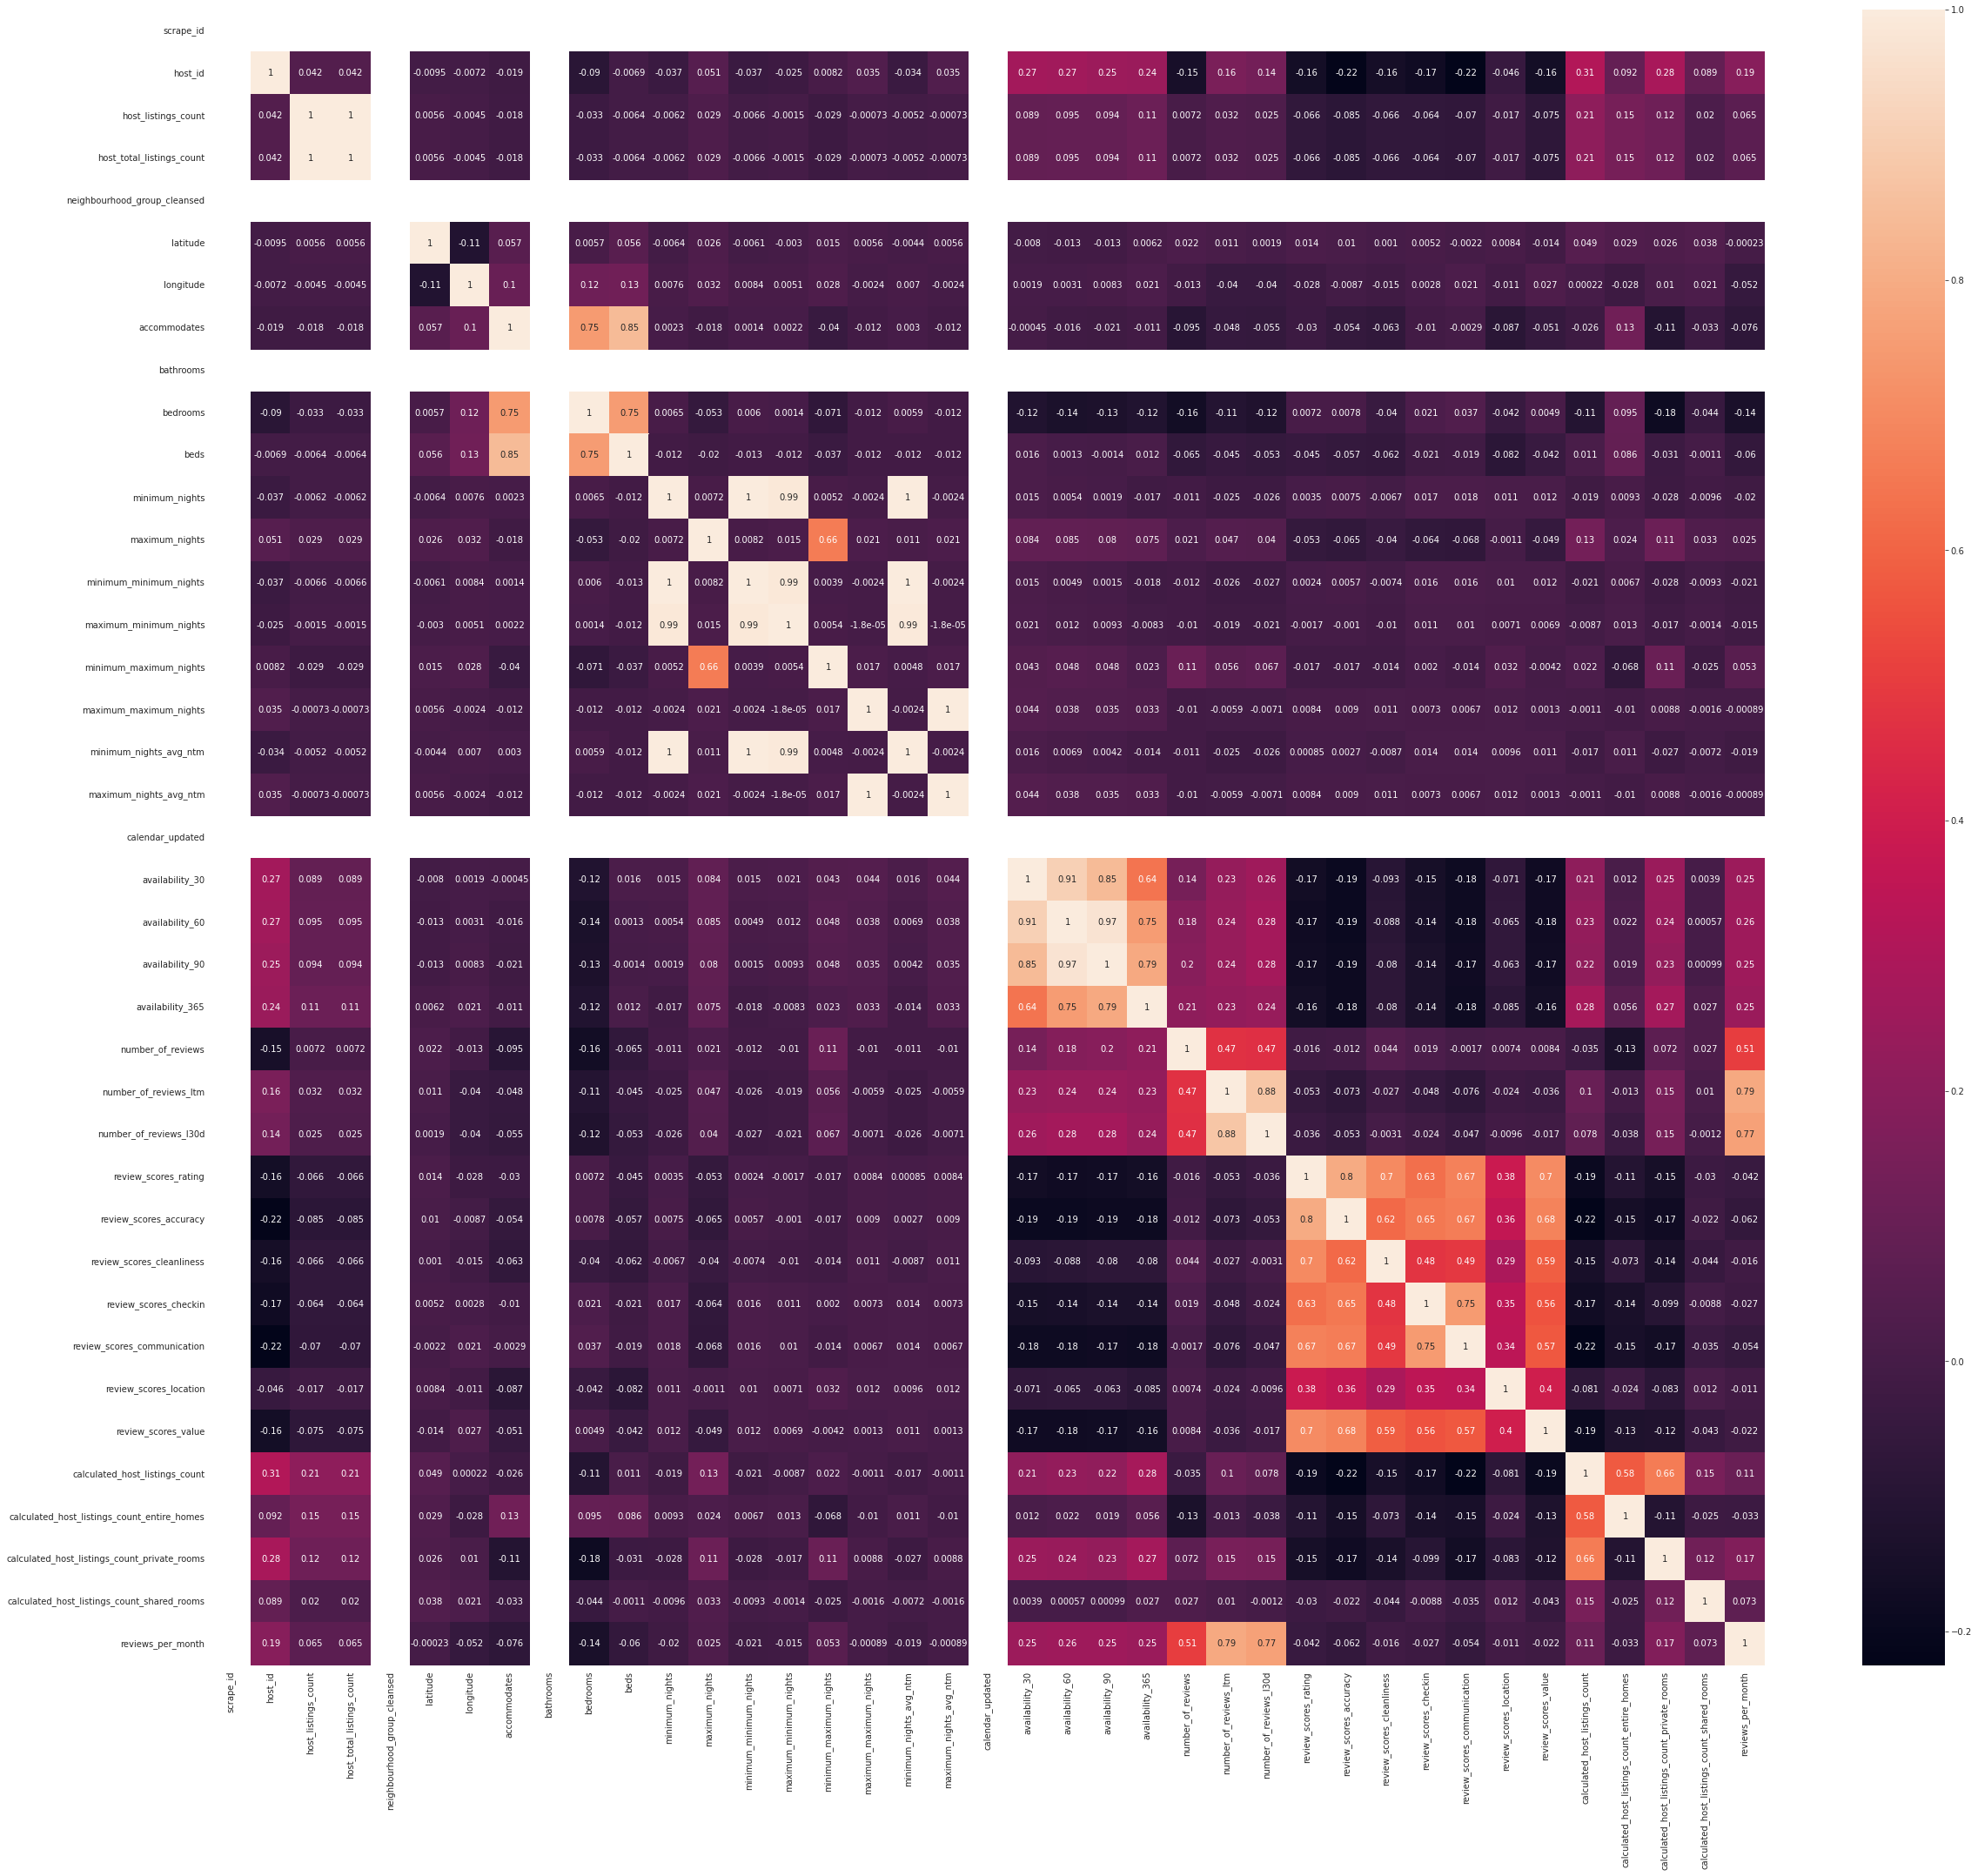

In [ ]:
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(40,35))  
dataplot = sns.heatmap(listings_details_ams.corr(), annot=True)
# displaying heatmap
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06830cfd90>,
      dtype=object)

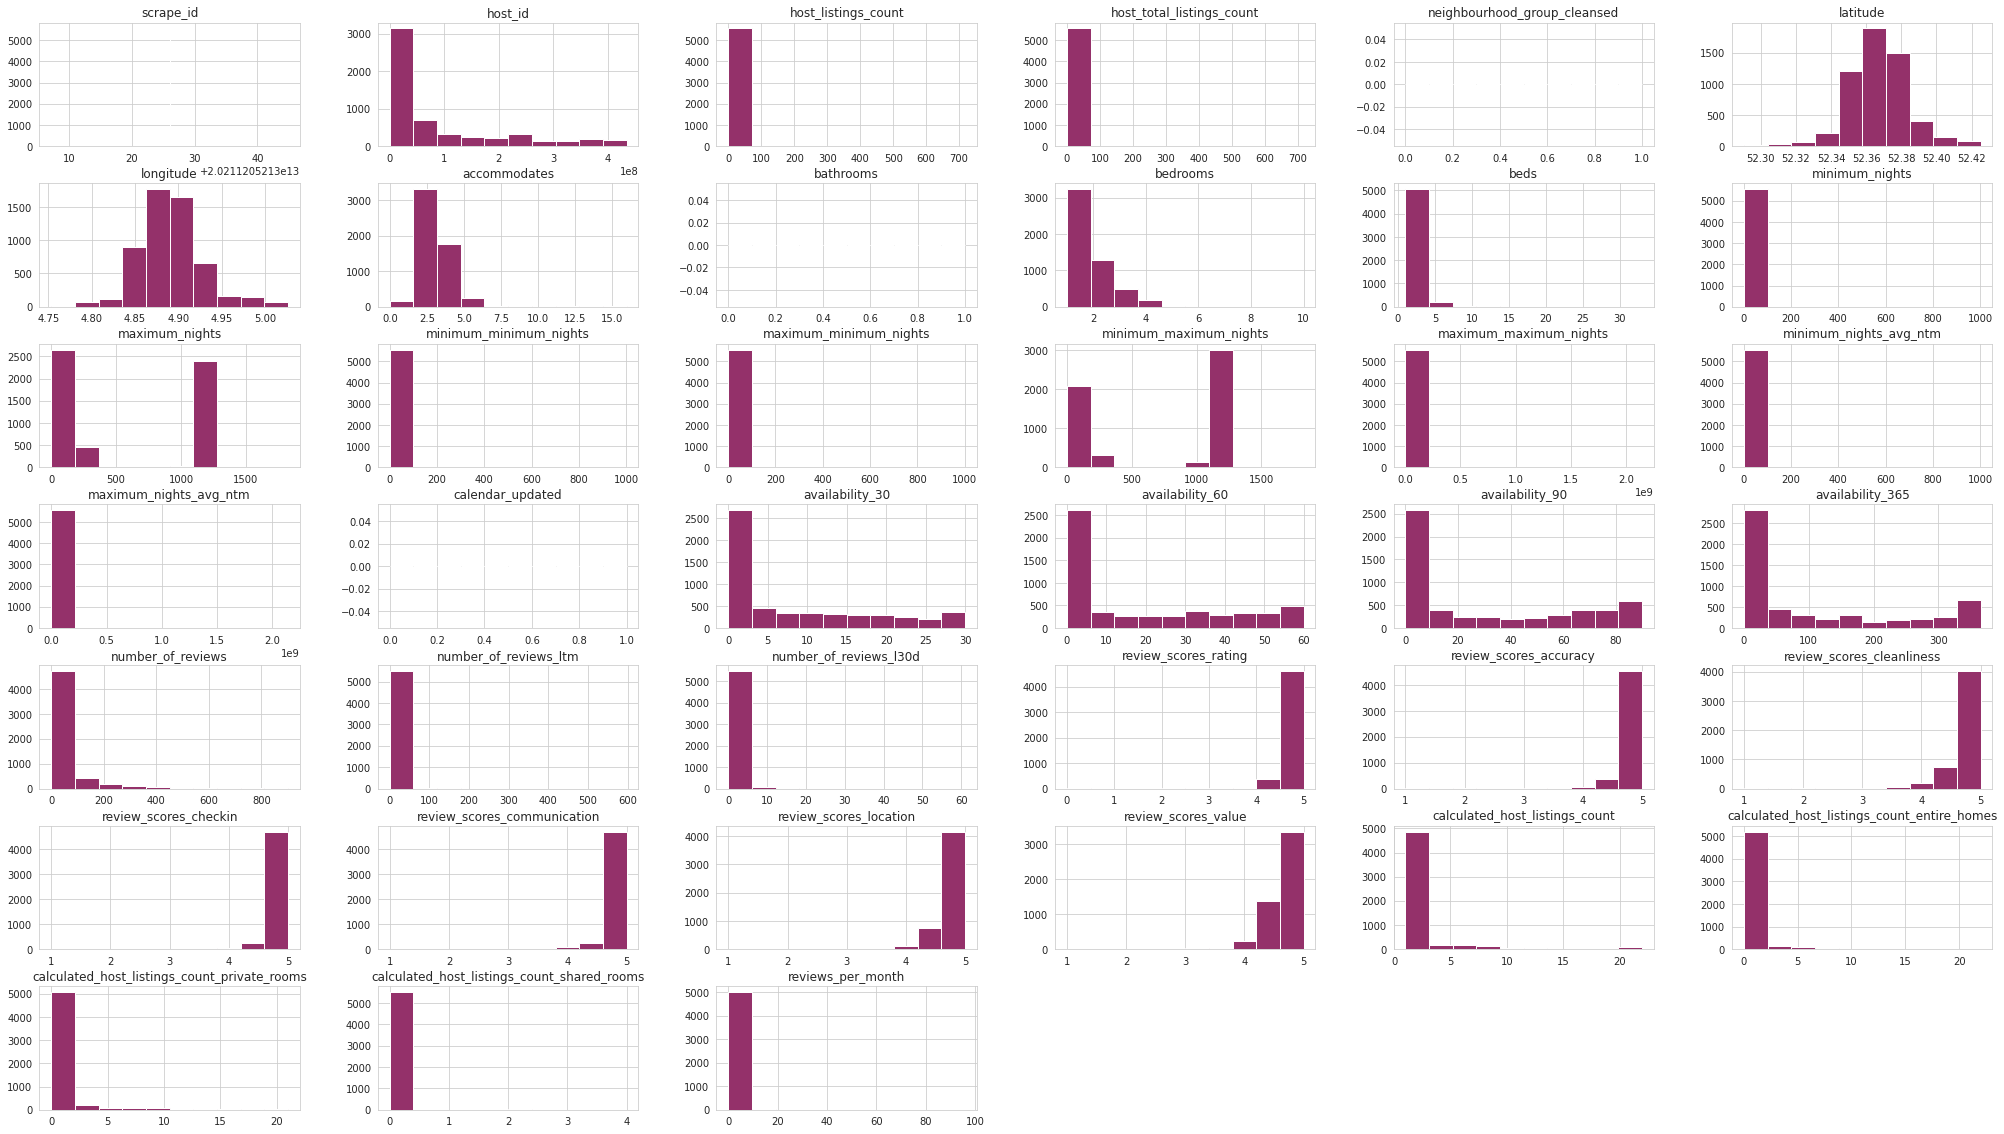

In [ ]:
listings_details_ams.hist(figsize= (35,20), color="#94316A")
plt.show()

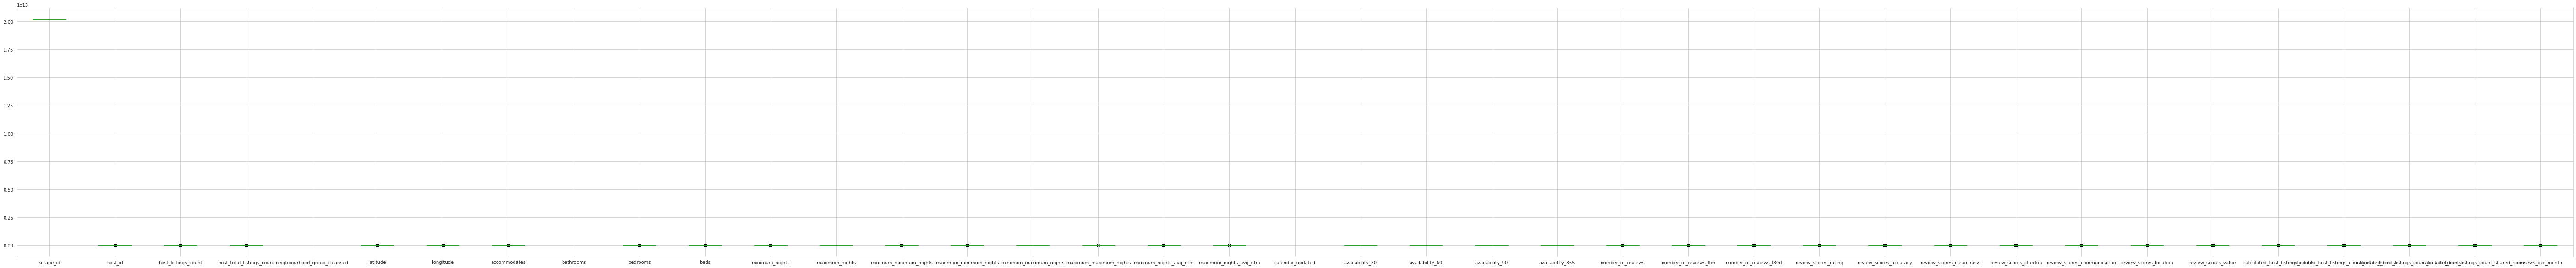

In [ ]:
# Creating plot
# plt.boxplot(df)
listings_details_ams.plot.box(grid='True',figsize=(100,10))
# show plot
plt.show()

In [ ]:
# Show the dimention of Listings Details dataset
listings_details_ams.shape

(5556, 73)

In [ ]:
# Show the informarion of columns in Listings Details dataset
listings_details_ams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5556 entries, 2818 to 53671581
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   5556 non-null   object 
 1   scrape_id                                     5556 non-null   int64  
 2   last_scraped                                  5556 non-null   object 
 3   name                                          5556 non-null   object 
 4   description                                   5545 non-null   object 
 5   neighborhood_overview                         3971 non-null   object 
 6   picture_url                                   5556 non-null   object 
 7   host_id                                       5556 non-null   int64  
 8   host_url                                      5556 non-null   object 
 9   host_name                                     5556 non-n

In [ ]:
# Get the Descriptive statistics to Listings Details dataset
listings_details_ams.describe()

scrape_id       host_id  host_listings_count  \
count  5.556000e+03  5.556000e+03          5556.000000   
mean   2.021121e+13  8.905295e+07             2.548056   
std    1.187607e+00  1.156927e+08            14.358770   
min    2.021121e+13  3.159000e+03             0.000000   
25%    2.021121e+13  8.913168e+06             1.000000   
50%    2.021121e+13  3.020259e+07             1.000000   
75%    2.021121e+13  1.337386e+08             2.000000   
max    2.021121e+13  4.346341e+08           718.000000   

       host_total_listings_count  neighbourhood_group_cleansed     latitude  \
count                5556.000000                           0.0  5556.000000   
mean                    2.548056                           NaN    52.367131   
std                    14.358770                           NaN     0.017001   
min                     0.000000                           NaN    52.290340   
25%                     1.000000                           NaN    52.356640   
50%                     1.000000                           NaN    52.366705   
75%                     2.000000                           NaN    52.376622   
max                   718.000000                           NaN    52.425120   

         longitude  accommodates  bathrooms     bedrooms  ...  \
count  5556.000000   5556.000000        0.0  5231.000000  ...   
mean      4.891413      2.955004        NaN     1.579621  ...   
std       0.036295      1.460722        NaN     0.913107  ...   
min       4.753510      0.000000        NaN     1.000000  ...   
25%       4.869447      2.000000        NaN     1.000000  ...   
50%       4.888665      2.000000        NaN     1.000000  ...   
75%       4.908602      4.000000        NaN     2.000000  ...   
max       5.026430     16.000000        NaN    10.000000  ...   

       review_scores_cleanliness  review_scores_checkin  \
count                5033.000000            5034.000000   
mean                    4.752221               4.873059   
std                     0.321210               0.246774   
min                     1.000000               1.000000   
25%                     4.660000               4.850000   
50%                     4.850000               4.950000   
75%                     4.970000               5.000000   
max                     5.000000               5.000000   

       review_scores_communication  review_scores_location  \
count                  5034.000000             5034.000000   
mean                      4.880840                4.781172   
std                       0.250826                0.248882   
min                       1.000000                1.000000   
25%                       4.860000                4.670000   
50%                       4.960000                4.840000   
75%                       5.000000                4.970000   
max                       5.000000                5.000000   

       review_scores_value  calculated_host_listings_count  \
count          5034.000000                     5556.000000   
mean              4.640969                        2.181066   
std               0.306860                        3.158970   
min               1.000000                        1.000000   
25%               4.530000                        1.000000   
50%               4.680000                        1.000000   
75%               4.810000                        2.000000   
max               5.000000                       22.000000   

       calculated_host_listings_count_entire_homes  \
count                                  5556.000000   
mean                                      1.116631   
std                                       2.020526   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                       1.000000   
max                                      22.000000   

       calculated_host_listings_count_private_rooms 

In [ ]:
# show the count of null values in the Listings Details dataset. if the Listings Details dataset has null values, it will return the count of null in all columns otherwise it will return 0
total_miss = listings_details_ams.isnull().sum()
# Calclate the persange of null values in the Listings Details dataset
percent_miss = (total_miss/listings_details_ams.isnull().count()*100)

# create Listings Details dataset frame from the total null values and percentage it
missing_data = pd.DataFrame({'Total missing':total_miss,'missing %':percent_miss})
# Sort the Listings Details dataset frame that has the total null values and percentage it
missing_data.sort_values(by='Total missing',ascending=False, inplace= True)
missing_data.head(35)

Total missing   missing %
neighbourhood_group_cleansed           5556  100.000000
calendar_updated                       5556  100.000000
bathrooms                              5556  100.000000
host_neighbourhood                     2367   42.602592
host_about                             2032   36.573074
host_response_time                     1911   34.395248
host_response_rate                     1911   34.395248
neighborhood_overview                  1585   28.527718
neighbourhood                          1585   28.527718
host_acceptance_rate                   1486   26.745860
review_scores_cleanliness               523    9.413247
review_scores_value                     522    9.395248
review_scores_location                  522    9.395248
review_scores_communication             522    9.395248
review_scores_checkin                   522    9.395248
review_scores_accuracy                  522    9.395248
reviews_per_month                       512    9.215263
first_review                            512    9.215263
review_scores_rating                    512    9.215263
last_review                             512    9.215263
bedrooms                                325    5.849532
beds                                    251    4.517639
license                                  40    0.719942
bathrooms_text                           14    0.251980
host_location                            13    0.233981
description                              11    0.197984
maximum_nights_avg_ntm                    1    0.017999
minimum_nights_avg_ntm                    1    0.017999
maximum_maximum_nights                    1    0.017999
minimum_maximum_nights                    1    0.017999
maximum_minimum_nights                    1    0.017999
minimum_minimum_nights                    1    0.017999
host_verifications                        0    0.000000
host_since                                0    0.000000
calendar_last_scraped                     0    0.000000

### **Feature Engineering of Listings Details DataSet** 

#### **Clean DataSet**

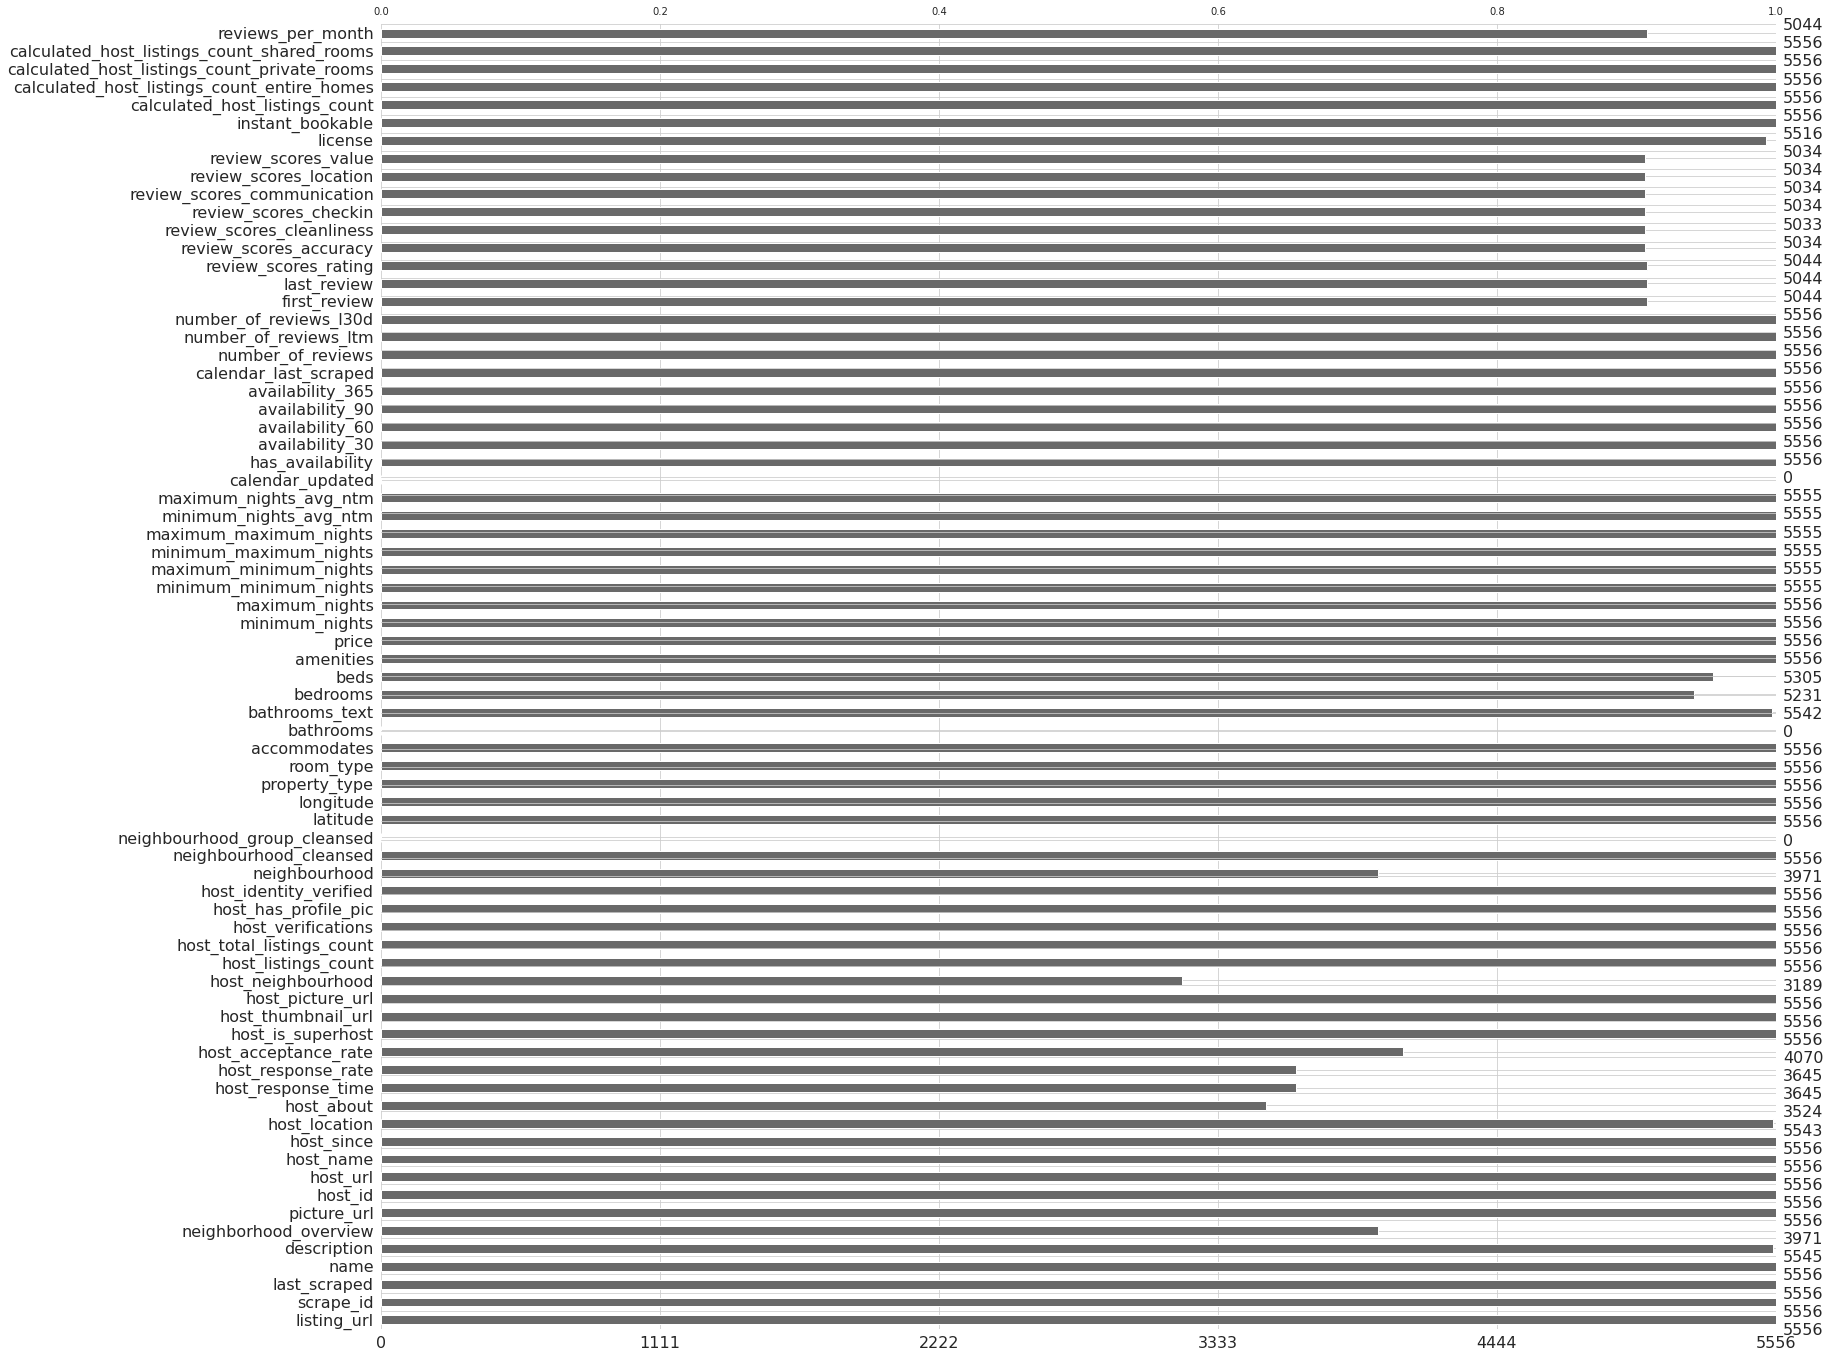

In [ ]:
msno.bar(listings_details_ams)

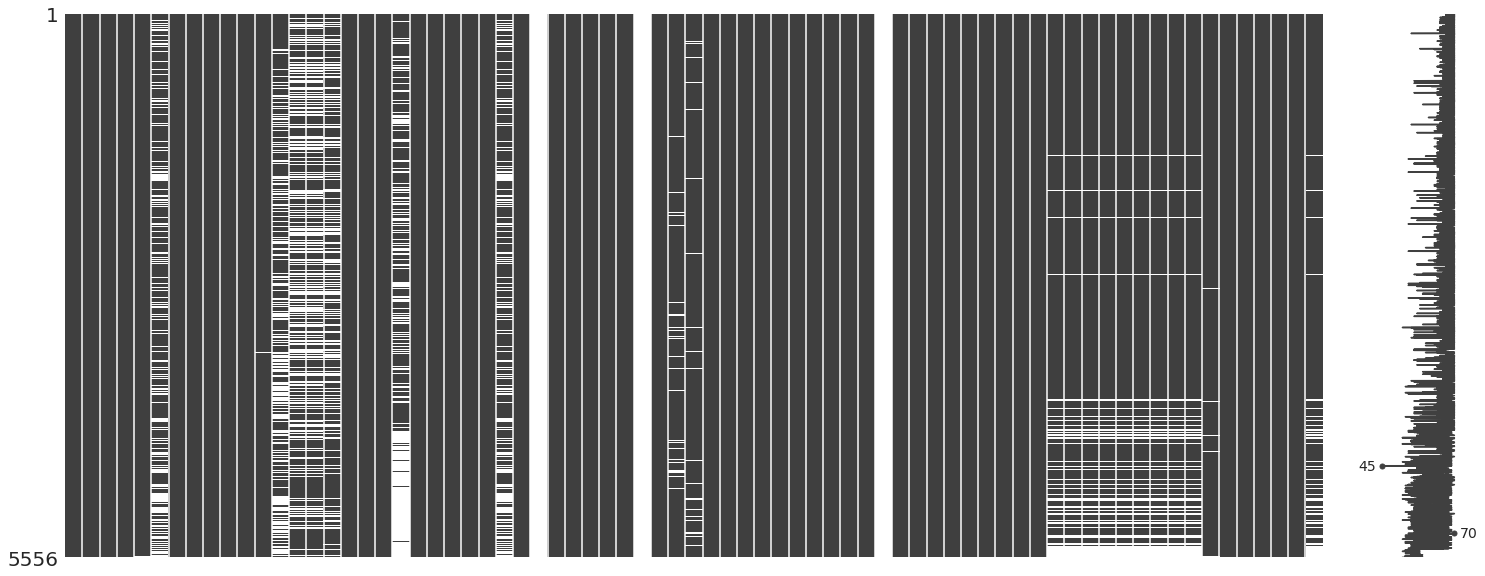

In [ ]:
msno.matrix(listings_details_ams)

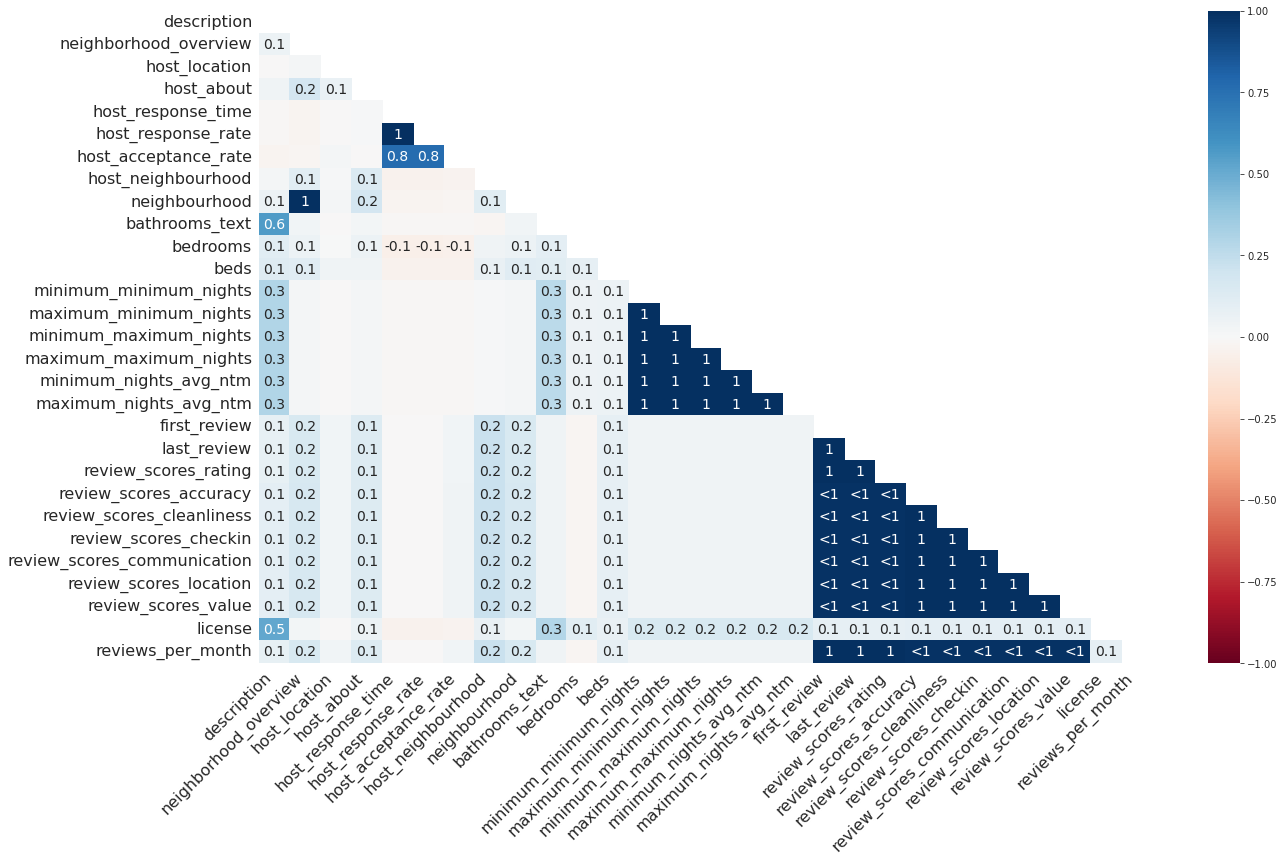

In [ ]:
msno.heatmap(listings_details_ams)

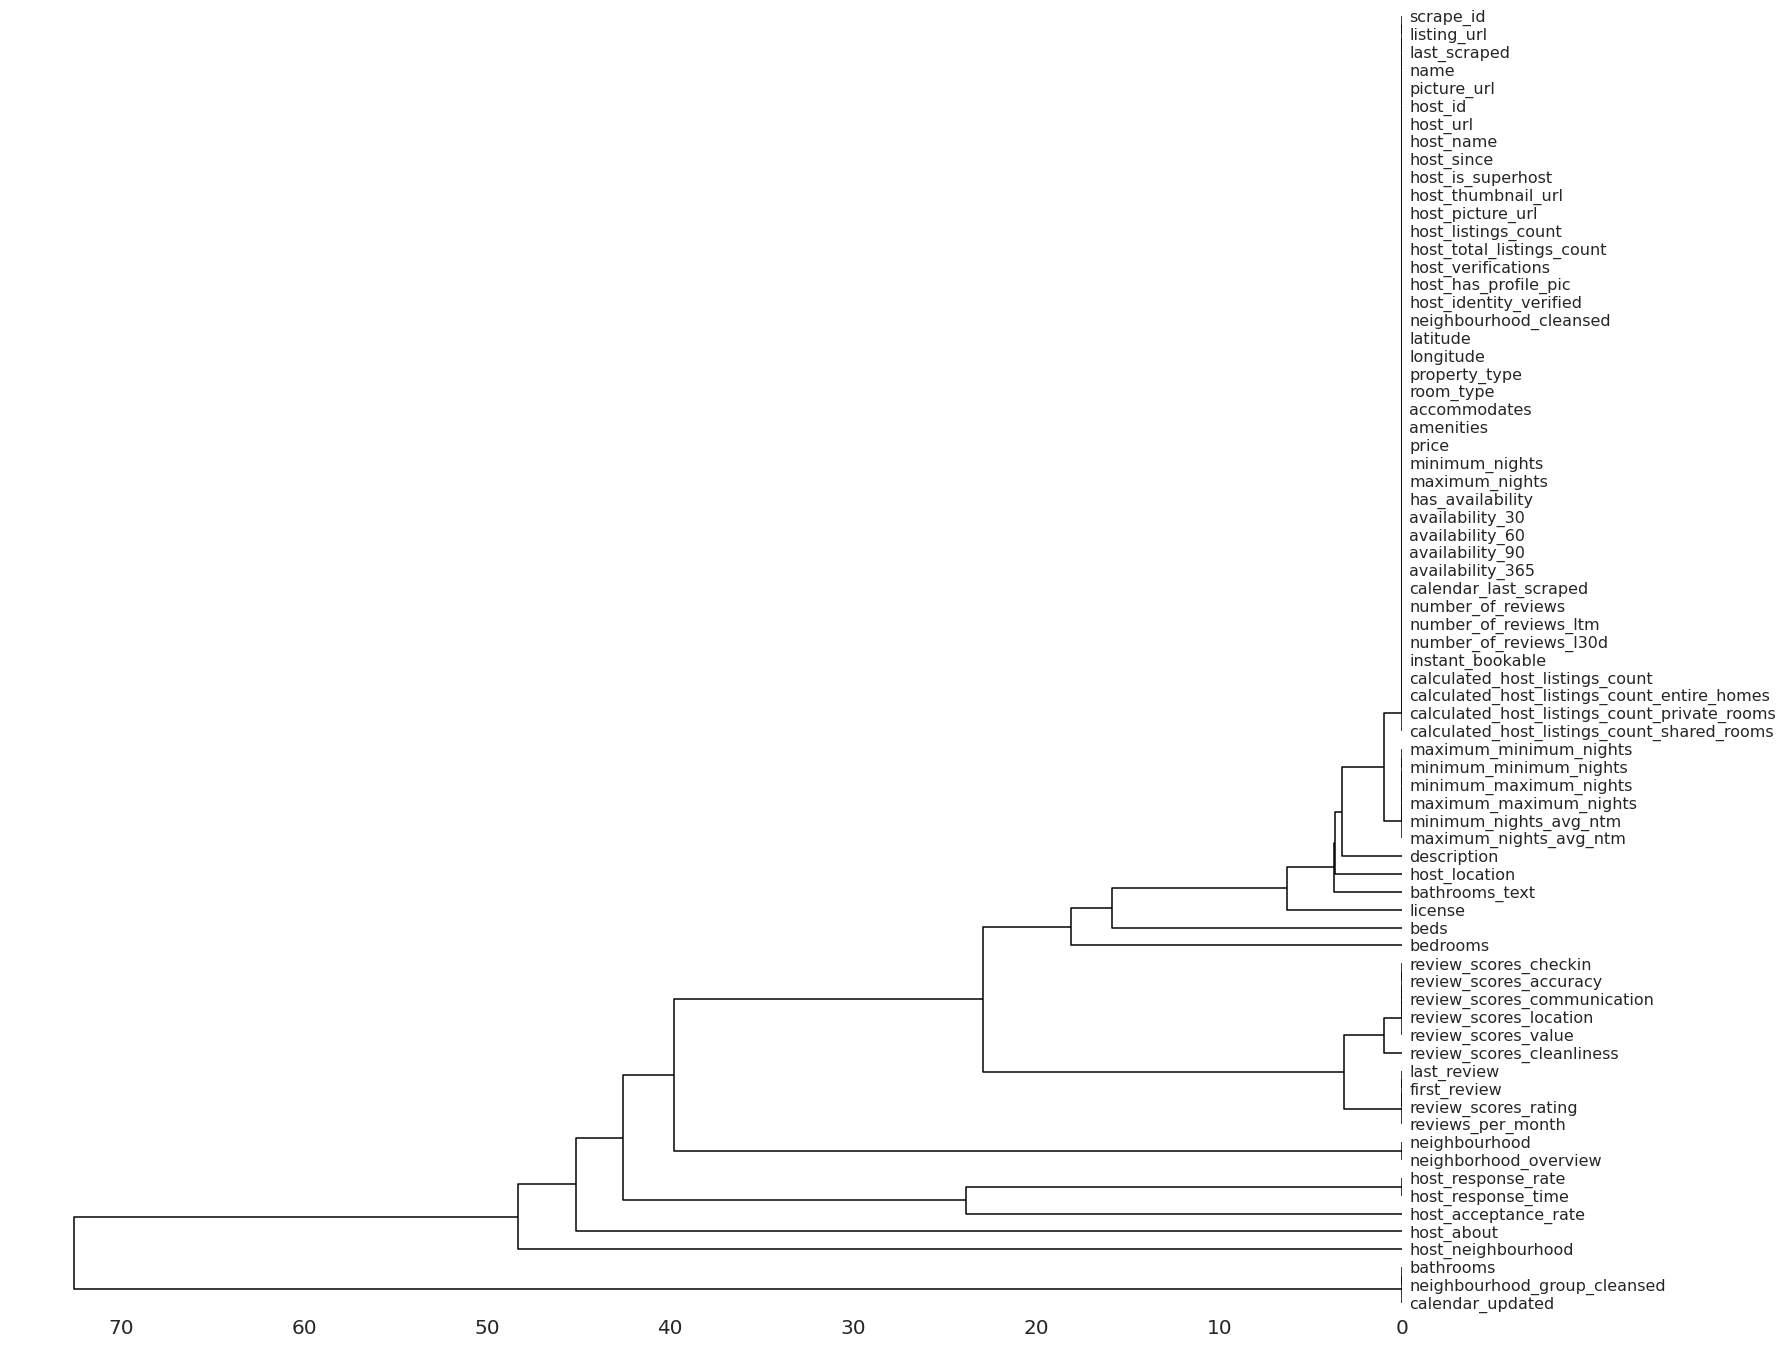

In [ ]:
msno.dendrogram(listings_details_ams)

In [ ]:
# Drop Columns from the Listings Details dataset 
listings_details_ams.drop(['neighbourhood_group_cleansed', 'calendar_updated', 'bathrooms', 'listing_url', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'host_id', 'host_name', 'scrape_id', 'host_location', 'host_about', 'host_neighbourhood', 'license'],axis = 1, inplace= True)

In [ ]:
listings_details_ams.price = listings_details_ams.price.replace(',', '', regex= True).str.replace('$', '', regex= True).astype('float')

In [ ]:
# use lambda and distutils to go from string to boolean expression
listings_details_ams = listings_details_ams.assign(host_is_superhost=listings_details_ams['host_is_superhost'].apply(lambda x: bool(strtobool(x))))
listings_details_ams = listings_details_ams.assign(host_has_profile_pic=listings_details_ams['host_has_profile_pic'].apply(lambda x: bool(strtobool(x))))
listings_details_ams = listings_details_ams.assign(host_identity_verified=listings_details_ams['host_identity_verified'].apply(lambda x: bool(strtobool(x))))
listings_details_ams = listings_details_ams.assign(instant_bookable=listings_details_ams['instant_bookable'].apply(lambda x: bool(strtobool(x))))
listings_details_ams = listings_details_ams.assign(has_availability=listings_details_ams['has_availability'].apply(lambda x: bool(strtobool(x))))

In [ ]:
# Replace the % to space in this dataset
listings_details_ams.host_response_rate = listings_details_ams.host_response_rate.replace('%', '', regex= True).astype('float')
listings_details_ams.host_acceptance_rate = listings_details_ams.host_acceptance_rate.replace('%', '', regex= True).astype('float')

In [ ]:
# Convert the datatype of the Date Column from object to datetime in Calendar dataset
listings_details_ams.last_scraped = pd.to_datetime(listings_details_ams.last_scraped)
listings_details_ams.host_since = pd.to_datetime(listings_details_ams.host_since)
listings_details_ams.calendar_last_scraped = pd.to_datetime(listings_details_ams.calendar_last_scraped)
listings_details_ams.first_review = pd.to_datetime(listings_details_ams.first_review)
listings_details_ams.last_review = pd.to_datetime(listings_details_ams.last_review)

In [ ]:
# Change the values to some columns in this dataset
listings_details_ams.host_response_time.replace(list(listings_details_ams.host_response_time.value_counts().index), [1, 3, 24, 72], inplace= True)

In [ ]:
# Fill the null values to the features in this dataset
# listings_details_ams.neighborhood_overview.fillna('No neighborhood overview', inplace= True) 
listings_details_ams.bathrooms_text.fillna(listings_details_ams.bathrooms_text.mode()[0], inplace=True)
listings_details_ams.description.fillna('No description', inplace= True) 

In [ ]:
# Reblace the some values of bathrooms_text in this dataset
listings_details_ams.bathrooms_text.replace(['Private half-bath', 'Half-bath', 'Shared half-bath'], ['0.5 Private bath', '0.5 bath', '0.5 Shared bath'], inplace= True)
# Extract the more feature from the column bathroom in this dataset 
listings_details_ams['num_bathrooms'] = listings_details_ams.bathrooms_text.str.extract("(\d*\.?\d+)", expand=True).astype('float')
listings_details_ams.bathrooms_text = listings_details_ams.bathrooms_text.str.replace('\d+', '')

In [ ]:
# Cleaning the columns in this dataset 
listings_details_ams.room_type = listings_details_ams.room_type.apply(clean_text)
listings_details_ams.neighbourhood_cleansed = listings_details_ams.neighbourhood_cleansed.apply(clean_text)
listings_details_ams.host_verifications = listings_details_ams.host_verifications.apply(clean_text)
listings_details_ams.property_type = listings_details_ams.property_type.apply(clean_text)
listings_details_ams.name = listings_details_ams.name.apply(clean_text)
listings_details_ams.amenities = listings_details_ams.amenities.apply(clean_text)
listings_details_ams.bathrooms_text = listings_details_ams.bathrooms_text.apply(clean_text).apply(stemming)

In [ ]:
# Cleaning the data without null values in this dataset
# listings_details_ams.neighbourhood.replace(listings_details_ams.neighbourhood.value_counts().index.tolist(), list(map(lambda x: x.replace(x, clean_text(x)), list(listings_details_ams.neighbourhood.value_counts().index))), inplace= True)
listings_details_ams.neighborhood_overview.replace(listings_details_ams.neighborhood_overview.value_counts().index.tolist(), list(map(lambda x: x.replace(x, clean_text(x)), list(listings_details_ams.neighborhood_overview.value_counts().index))), inplace= True)


In [ ]:
# translate some the feature in this dataset 
translate_description = google_translate(listings_details_ams.description.unique().tolist())
listings_details_ams.description.replace(translate_description, list(map(lambda x: x.replace(x, clean_text(x)), translate_description)), inplace= True)

In [ ]:
# Fill null values of columns in this dataset
listings_details_ams.host_response_rate.fillna(listings_details_ams.host_response_rate.mean(), inplace= True)
listings_details_ams.host_acceptance_rate.fillna(listings_details_ams.host_acceptance_rate.mean(), inplace= True)
listings_details_ams.host_response_time.fillna(listings_details_ams.host_response_time.mode()[0], inplace= True)
listings_details_ams.beds.fillna(listings_details_ams.beds.mode()[0],inplace = True)
listings_details_ams.bedrooms.fillna(listings_details_ams.bedrooms.mode()[0],inplace = True)

In [ ]:
# Drop null values of this columns dataset
listings_details_ams.dropna(subset=['review_scores_value', 'review_scores_cleanliness'],how='any',inplace=True)

In [ ]:
listings_details_ams["neighbourhood"].replace(["-", '  '], [" ", " "], inplace= True, regex= True)
listings_details_ams["neighbourhood"].replace(["\*,", ","] , ['', ''], inplace= True, regex= True)
listings_details_ams['neighbourhood'] = listings_details_ams["neighbourhood"].str.replace("Amsterdam Noord Holland Netherlands","Amsterdam North Holland Netherlands")
listings_details_ams['neighbourhood'] = listings_details_ams["neighbourhood"].str.replace("amsterdam holland netherlands","amsterdam north holland netherlands")
listings_details_ams['neighbourhood'] = listings_details_ams["neighbourhood"].str.replace("NH","North Holland")
listings_details_ams['neighbourhood'] = listings_details_ams["neighbourhood"].str.replace("Noord Holland","North Holland")
listings_details_ams['neighbourhood'] = listings_details_ams["neighbourhood"].str.replace("Noord  Holland","North Holland")
listings_details_ams['neighbourhood'] = listings_details_ams["neighbourhood"].str.replace("nord holland","north holland")
listings_details_ams['neighbourhood'] = listings_details_ams["neighbourhood"].str.replace('amsterdam netherlands netherlands','amsterdam netherlands')
listings_details_ams['neighbourhood'] = listings_details_ams["neighbourhood"].str.replace(' amsterdam netherlands','amsterdam netherlands')
listings_details_ams['neighbourhood'] = listings_details_ams["neighbourhood"].str.lower()

In [ ]:
listings_details_ams.neighbourhood.unique()

array(['amsterdam north holland netherlands', nan,
       'amsterdam netherlands netherlands',
       'watergraafsmeer north holland netherlands',
       'jordaan north holland netherlands',
       'zeeburg north holland netherlands',
       'amsterdam haarlemmerbuurt netherlands', 'amsterdam netherlands',
       'amsterdam zuidoost north holland netherlands',
       'amsterdam sn netherlands', 'amsterdam  amsterdam netherlands',
       'amsterdam north holland 6 netherlands',
       'amsterdam zuid oost north holland netherlands',
       'amsterdam emmy andriessestraat netherlands',
       'amsterdam ah netherlands', 'amsterdam ga netherlands',
       'amsterdam gd netherlands', 'amsterdam amstel netherlands',
       'amsterdam  2 de egelantiersdwarsstraat 13 iii netherlands',
       'amsterdam vx netherlands', 'netherlands',
       'amsterdam dp netherlands',
       'badhoevedorp north holland netherlands',
       'amsterdam  north holland netherlands',
       'amsterdam frederiksstr

In [ ]:
[listings_details_ams.loc[listings_details_ams.neighbourhood_cleansed == d].neighbourhood.value_counts().index[0] for d in listings_details_ams[listings_details_ams.neighbourhood.isnull()].neighbourhood_cleansed.value_counts().index if d != np.nan]

['amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam zuidoost north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands',
 'amsterdam north holland netherlands']

In [ ]:
listings_details_ams.neighbourhood.fillna('amsterdam north holland netherlands', inplace= True)

In [ ]:
listings_details_ams.loc[(listings_details_ams.neighbourhood == 'amsterdam north holland netherlands') & (listings_details_ams.neighbourhood_cleansed == 'gaasperdam  driemond')].neighbourhood = 'amsterdam zuidoost north holland netherlands'

In [ ]:
listings_details_ams.neighborhood_overview.fillna(listings_details_ams.loc[(listings_details_ams.neighbourhood == 'amsterdam north holland netherlands')].neighborhood_overview.mode()[0], inplace= True)

In [ ]:
listings_details_ams.neighborhood_overview.isnull().sum()

0

In [ ]:
listings_details_ams.neighborhood_overview.replace(listings_details_ams.neighborhood_overview.value_counts().index.tolist(), list(map(lambda x: x.replace(x, clean_text(x)), list(listings_details_ams.neighborhood_overview.value_counts().index))), inplace= True)


In [ ]:
listings_details_ams.isnull().sum()

last_scraped                                    0
name                                            0
description                                     0
neighborhood_overview                           0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0


In [ ]:
# group by Team, get mean, min, and max value of Age for each value of Team.
group_price_neighbourhood = listings_details_ams.groupby('neighbourhood').agg({'price': ['mean']})
group_price_neighbourhood

price
                                                          mean
neighbourhood                                                 
 amsterdam netherlands                               76.000000
1054 zv north holland netherlands                   104.000000
amsterdam  2 de egelantiersdwarsstraat 13 iii n...  250.000000
amsterdam  amsterdam netherlands                    409.000000
amsterdam  netherlands                               85.000000
amsterdam  north holland netherlands                135.000000
amsterdam ah netherlands                            133.000000
amsterdam amstel netherlands                         76.000000
amsterdam centrum north holland netherlands          94.000000
amsterdam dp netherlands                             72.000000
amsterdam emmy andriessestraat netherlands          499.000000
amsterdam frederiksstraat netherlands               140.000000
amsterdam ga netherlands                             71.000000
amsterdam gd netherlands                            695.000000
amsterdam haarlemmerbuurt netherlands                69.000000
amsterdam holland netherlands                        96.000000
amsterdam netherlands                               233.050633
amsterdam netherlands netherlands                   405.000000
amsterdam nm netherlands                             86.000000
amsterdam nord holland netherlands                  184.333333
amsterdam north holland 6 netherlands                50.000000
amsterdam north holland netherlands                 162.203285
amsterdam sn netherlands                            108.000000
amsterdam the netherlands netherlands               277.000000
amsterdam vx netherlands                             76.000000
amsterdam zuid oost north holland netherlands        85.333333
amsterdam zuidoost north holland netherlands         89.000000
badhoevedorp north holland netherlands               94.000000
central amsterdam amsterdam netherlands              42.000000
diemen north holland netherlands                     75.000000
duivendrecht north holland netherlands              175.000000
jordaan north holland netherlands                    85.000000
landsmeer north holland netherlands                  95.000000
lijnden north holland netherlands                   100.000000
netherlands                                         194.666667
oostzaan north holland netherlands                  300.000000
ouder amstel north holland netherlands              247.500000
watergraafsmeer north holland netherlands            65.000000
zeeburg north holland netherlands                   145.000000

In [ ]:
# rename columns
group_price_neighbourhood.columns = ['avg_price_neighbourhood']

# reset index to get grouped columns back
group_price_neighbourhood = group_price_neighbourhood.reset_index()

In [ ]:
df_group = pd.DataFrame(group_price_neighbourhood, index= None)

In [ ]:
listings_details_ams = pd.merge(listings_details_ams, df_group)
listings_details_ams.shape

(5033, 60)

In [ ]:
listings_details_ams.price.describe()

count    5033.000000
mean      162.987681
std       111.441724
min         0.000000
25%        96.000000
50%       136.000000
75%       198.000000
max      1818.000000
Name: price, dtype: float64

In [ ]:
price_level = []
for i in listings_details_ams.price.value_counts().index:
    if i < 95:
        price_level.append(1)
    elif i < 188 and i>= 95:
        price_level.append(2)
    else:
        price_level.append(3)

In [ ]:
listings_details_ams['price_level'] = listings_details_ams.price
listings_details_ams.price_level.replace(listings_details_ams.price_level.value_counts().index, price_level, inplace= True)

In [ ]:
listings_details_ams.price_level = listings_details_ams.price_level.astype(int)
listings_details_ams.price_level.value_counts()

2    2470
3    1383
1    1180
Name: price_level, dtype: int64

#### **Outliers**

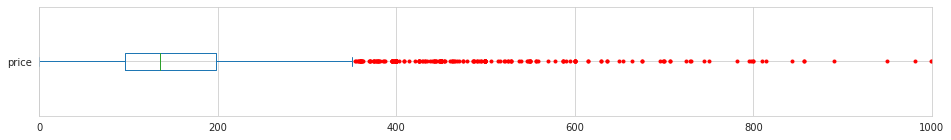

In [ ]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
listings_details_ams['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2));

In [ ]:
listings_details_ams.drop(listings_details_ams[ (listings_details_ams.price > 400) | (listings_details_ams.price == 0) ].index, axis=0, inplace=True)

In [ ]:
listings_details_ams['price'].describe()

count    4873.000000
mean      149.397907
std        74.281072
min        20.000000
25%        95.000000
50%       133.000000
75%       188.000000
max       400.000000
Name: price, dtype: float64

In [ ]:
print("The dataset has {} rows and {} columns - after being price-wise preprocessed.".format(*listings_details_ams.shape))

The dataset has 4873 rows and 61 columns - after being price-wise preprocessed.


In [ ]:
# # extract numbers 
# listings_details_ams['size'] = listings_details_ams['description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)
# listings_details_ams['size'] = listings_details_ams['size'].str.replace("\D", "")

# # change datatype of size into float
# listings_details_ams['size'] = listings_details_ams['size'].astype(float)

# print('NaNs in size_column absolute:     ', listings_details_ams['size'].isna().sum())
# print('NaNs in size_column in percentage:', round(listings_details_ams['size'].isna().sum()/len(listings_details_ams),3), '%')

In [ ]:
# listings_details_ams[['description', 'size']].head(10)

In [ ]:
# # drop description column
listings_details_ams.drop(['description'], axis=1, inplace=True)

In [ ]:
listings_details_ams['amenities']

0       extra pillow blanket dedic workspac tabl hot w...
1       hanger paid park premis hair dryer free street...
2       luggag dropoff allow outdoor dine area extra p...
3       hanger hair dryer coffe maker shampoo host gre...
4       hanger hair dryer coffe maker shampoo shower g...
                              ...                        
5027    luggag dropoff allow board game extra pillow b...
5028    hanger cabl tv crib hair dryer coffe maker coo...
5030    first aid kit hanger coffe maker kitchen dedic...
5031    hanger hair dryer coffe maker shampoo stove ki...
5032    luggag dropoff allow hair dryer gym washer dis...
Name: amenities, Length: 4873, dtype: object

In [ ]:
from collections import Counter

results = Counter()
listings_details_ams['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

results.most_common(30)

0       None
1       None
2       None
3       None
4       None
        ... 
5027    None
5028    None
5030    None
5031    None
5032    None
Name: amenities, Length: 4873, dtype: object

[('build staff hanger smoke alarm outlet cover long term stay allow heat wifi',
  8),
 ('hanger hair dryer shampoo privat entranc tv smoke alarm elev lock bedroom door long term stay allow dedic workspac heat wifi iron essenti',
  7),
 ('hair dryer privat entranc lock bedroom door long term stay allow heat wifi iron essenti',
  6),
 ('hair dryer shampoo tv smoke alarm lock bedroom door long term stay allow dedic workspac heat wifi elev essenti',
  6),
 ('hair dryer iron safe hanger long term stay allow fire extinguish wifi essenti first aid kit shampoo shower gel roomdarken shade hot water tv smoke alarm lock bedroom door bed linen carbon monoxid alarm cloth storag bodi soap ceil fan bathtub condition heat',
  6),
 ('first aid kit paid park garag premis smoke alarm long term stay allow fire extinguish wifi essenti',
  5),
 ('air condit hanger hair dryer shampoo tv smoke alarm dedic workspac heat wifi iron essenti',
  5),
 ('air condit luggag dropoff allow hair dryer mini fridg iron han

In [ ]:
# create a new dataframe
sub_df = pd.DataFrame(results.most_common(30), columns=['amenity', 'count'])

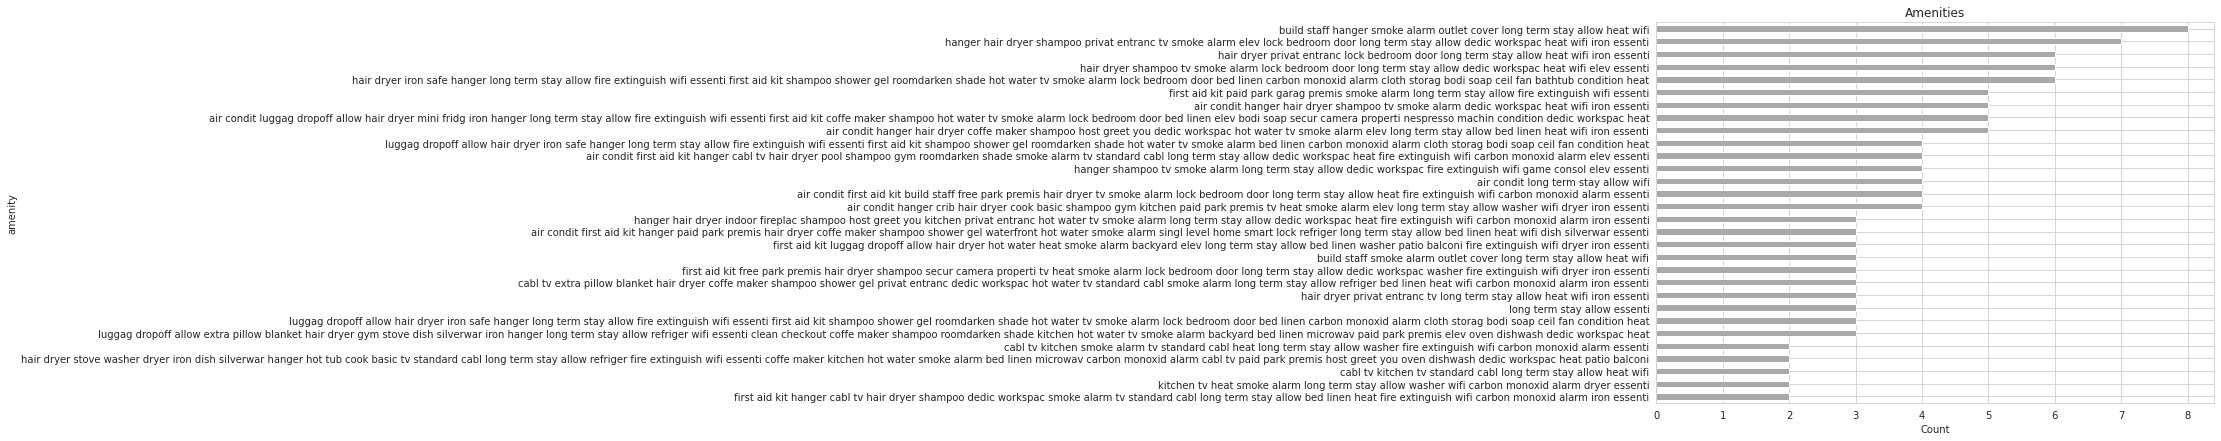

In [ ]:
# plot the Top 20
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,7), legend=False, color='darkgrey',
                                                      title='Amenities')
plt.xlabel('Count');

In [ ]:
listings_details_ams['Laptop_friendly_workspace'] = listings_details_ams['amenities'].str.contains('Laptop friendly workspace')
listings_details_ams['TV'] = listings_details_ams['amenities'].str.contains('TV')
listings_details_ams['Family_kid_friendly'] = listings_details_ams['amenities'].str.contains('Family/kid friendly')
listings_details_ams['Host_greets_you'] = listings_details_ams['amenities'].str.contains('Host greets you')
listings_details_ams['Smoking_allowed'] = listings_details_ams['amenities'].str.contains('Smoking allowed')

In [ ]:
listings_details_ams.drop(['amenities'], axis=1, inplace=True)

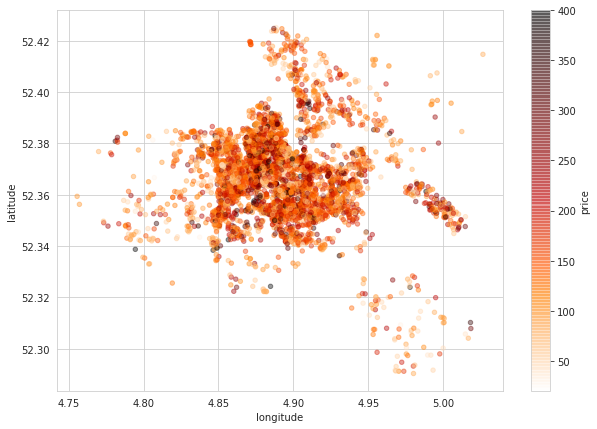

In [ ]:
listings_details_ams.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), 
        c="price", cmap="gist_heat_r", colorbar=True, sharex=False);

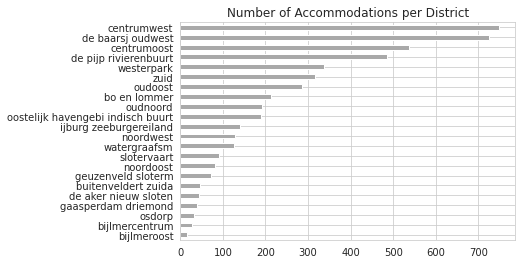

In [ ]:
listings_details_ams['neighbourhood_cleansed'].value_counts().sort_values().plot(kind='barh', color='darkgrey')
plt.title('Number of Accommodations per District');

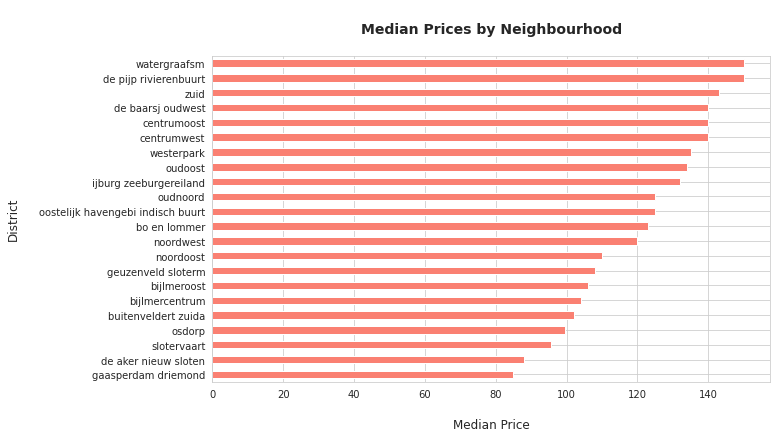

In [ ]:
# group_by neighbourhood groups, take the median price and store new values in sub_df 
df_grouped = pd.DataFrame(listings_details_ams.groupby(['neighbourhood_cleansed'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='neighbourhood_cleansed', y='price', 
                figsize=(10,6), legend=False, color='salmon')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Neighbourhood\n', fontsize=14, fontweight='bold');

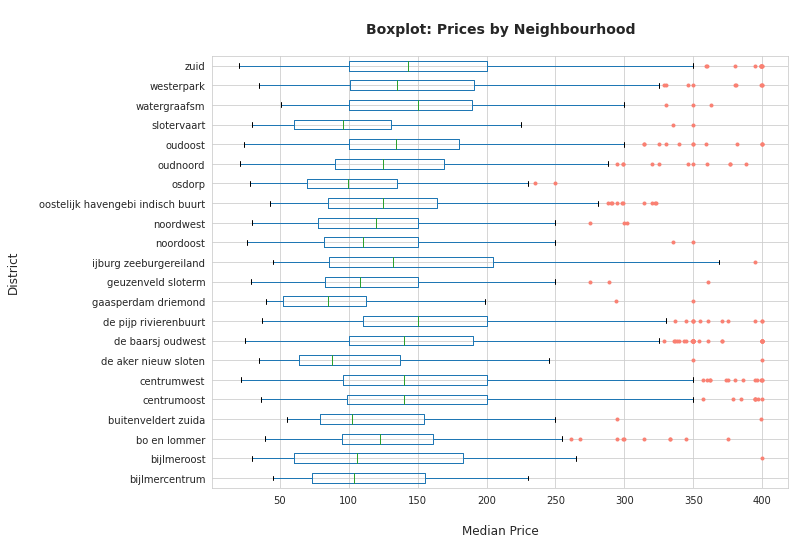

In [ ]:
red_square = dict(markerfacecolor='salmon', markeredgecolor='salmon', marker='.')

listings_details_ams.boxplot(column='price', by='neighbourhood_cleansed', 
           flierprops=red_square, vert=False, figsize=(10,8))

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nBoxplot: Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

# get rid of automatic boxplot title
plt.suptitle('');

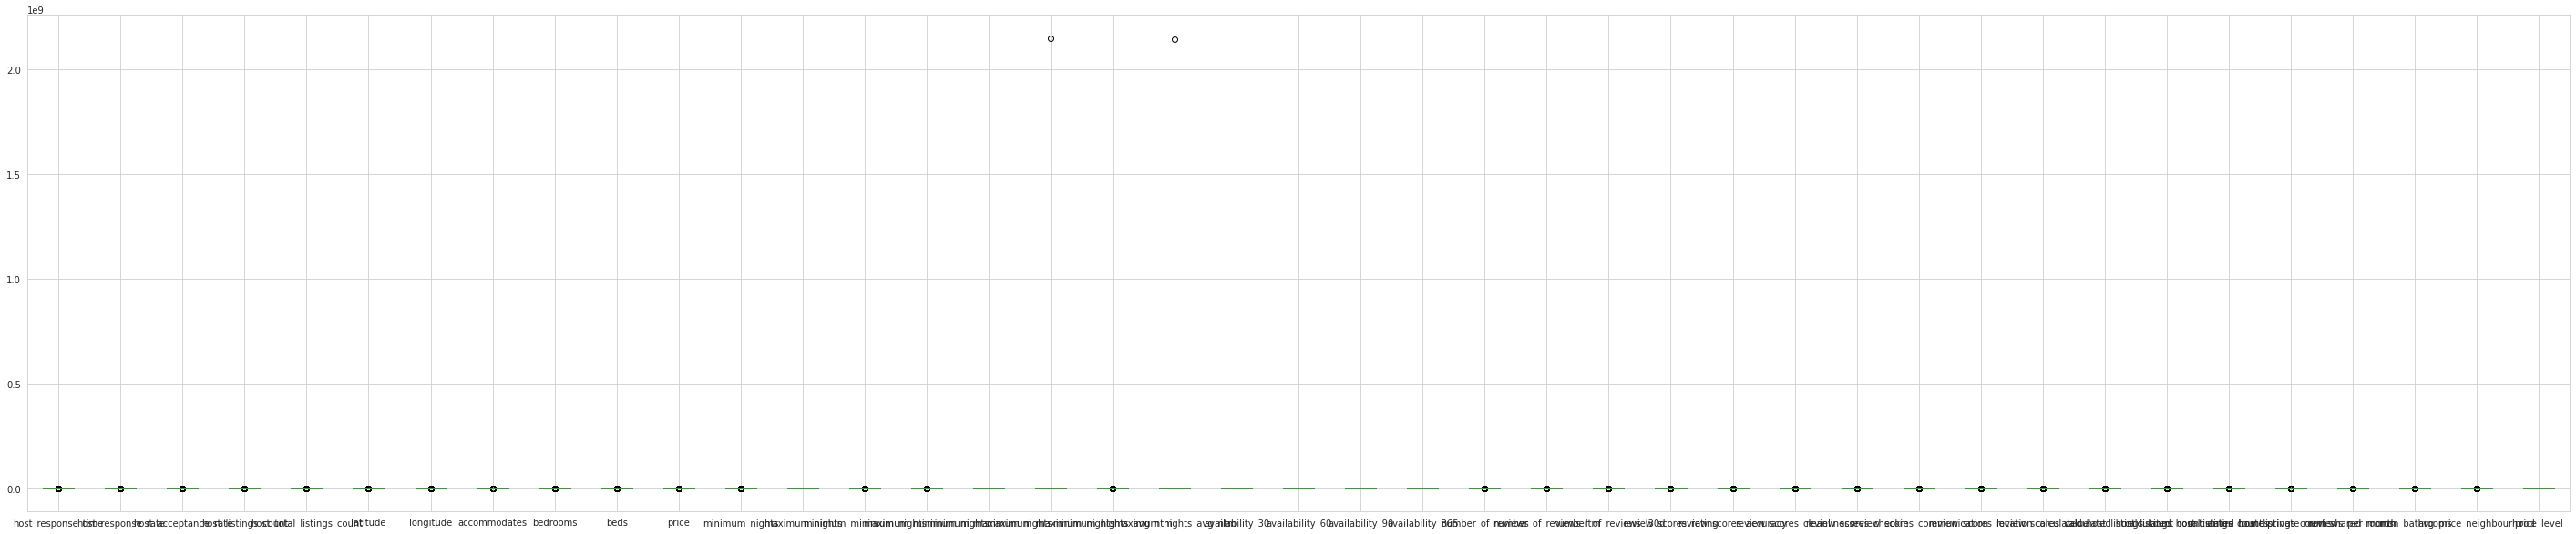

In [ ]:
# Creating plot
# plt.boxplot(df)
listings_details_ams.plot.box(grid='True',figsize=(50,10))
# show plot
plt.show()

In [ ]:
def cap_data(df):
    for col in df.select_dtypes(include=['int64', 'float64']):
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

In [ ]:
df = pd.DataFrame()
df['price'] = listings_details_ams.price

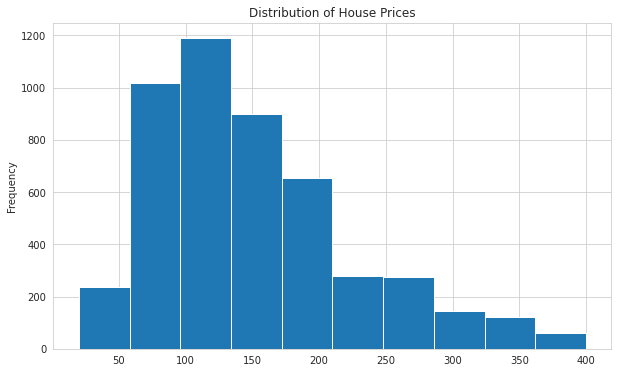

In [ ]:
df['price'].plot(kind='hist', figsize=(10,6), title='Distribution of House Prices')

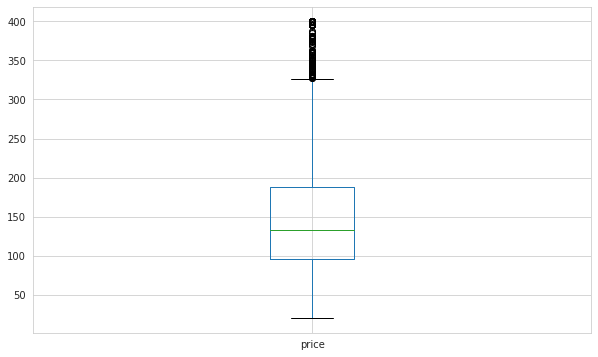

In [ ]:
df.boxplot(column='price', figsize=(10,6))

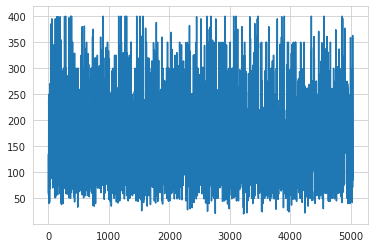

In [ ]:
df.price.plot();

In [ ]:
df.price.describe()

count    4873.000000
mean      149.397907
std        74.281072
min        20.000000
25%        95.000000
50%       133.000000
75%       188.000000
max       400.000000
Name: price, dtype: float64

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

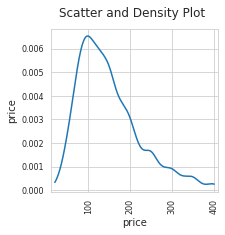

In [ ]:
plotScatterMatrix(df, 3, 2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f0680a77f90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0680a7dfd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0680a8c050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0680a84ad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0680a7d550>,
  <matplotlib.lines.Line2D at 0x7f0680a7da90>]}

Text(0.5, 1.0, 'Detecting outliers using Boxplot')

Text(0.5, 0, 'Sample')

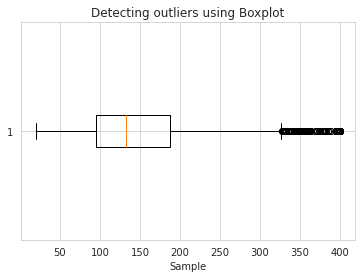

In [ ]:
plt.boxplot(df.price, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

In [ ]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [ ]:
sample_outliers = detect_outliers_zscore(df.price)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [385.0, 395.0, 395.0, 399.0, 399.0, 399.0, 399.0, 400.0, 397.0, 400.0, 400.0, 380.0, 381.0, 375.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 377.0, 388.0, 382.0, 399.0, 395.0, 400.0, 375.0, 379.0, 400.0, 395.0, 400.0, 400.0, 400.0, 375.0, 380.0, 399.0, 386.0, 395.0, 400.0, 380.0, 395.0, 399.0, 400.0, 395.0, 400.0, 400.0, 374.0, 400.0, 396.0, 377.0]


In [ ]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i> upr_bound):
            outliers.append(i)
    return outliers# Driver code


In [ ]:
sample_outliers = detect_outliers_iqr(df.price)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [328.0, 328.0, 329.0, 329.0, 329.0, 329.0, 330.0, 330.0, 330.0, 330.0, 330.0, 331.0, 331.0, 332.0, 333.0, 333.0, 333.0, 335.0, 335.0, 336.0, 336.0, 337.0, 337.0, 338.0, 338.0, 339.0, 340.0, 340.0, 340.0, 340.0, 342.0, 343.0, 344.0, 345.0, 345.0, 345.0, 345.0, 345.0, 345.0, 346.0, 346.0, 346.0, 347.0, 348.0, 349.0, 349.0, 349.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 354.0, 355.0, 357.0, 357.0, 359.0, 359.0, 360.0, 360.0, 360.0, 361.0, 361.0, 361.0, 362.0, 362.0, 363.0, 369.0, 371.0, 371.0, 371.0, 374.0, 375.0, 375.0, 375.0, 377.0, 377.0, 379.0, 380.0, 380.0, 380.0, 381.0, 382.0, 385.0, 386.0, 388.0, 395.0, 395.0, 395.0, 395.0, 395.0, 395.0, 395.0, 396.0, 397.0, 399.0, 399.0, 399.0, 399.0, 399.0, 399.0, 399.0, 400.0,

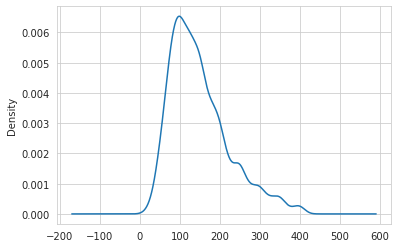

In [ ]:
df.price.plot.kde()

#### **Categorical Encoder**

In [ ]:
# Show the dimention of Listings Details dataset
listings_details_ams.shape

(4873, 64)

In [ ]:
# Show the informarion of columns in Listings Details dataset
listings_details_ams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4873 entries, 0 to 5032
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   last_scraped                                  4873 non-null   datetime64[ns]
 1   name                                          4873 non-null   object        
 2   neighborhood_overview                         4873 non-null   object        
 3   host_since                                    4873 non-null   datetime64[ns]
 4   host_response_time                            4873 non-null   float64       
 5   host_response_rate                            4873 non-null   float64       
 6   host_acceptance_rate                          4873 non-null   float64       
 7   host_is_superhost                             4873 non-null   bool          
 8   host_listings_count                           4873 non-null   int64 

In [ ]:
# Get the Descriptive statistics to Listings Details dataset
listings_details_ams.describe()

host_response_time  host_response_rate  host_acceptance_rate  \
count         4873.000000         4873.000000           4873.000000   
mean             5.009029           94.840311             78.119740   
std             10.575648           11.339770             25.762509   
min              1.000000            0.000000              0.000000   
25%              1.000000           94.271879             77.484029   
50%              1.000000          100.000000             77.484029   
75%              3.000000          100.000000            100.000000   
max             72.000000          100.000000            100.000000   

       host_listings_count  host_total_listings_count     latitude  \
count          4873.000000                4873.000000  4873.000000   
mean              2.397702                   2.397702    52.367174   
std               9.494481                   9.494481     0.016963   
min               0.000000                   0.000000    52.290340   
25%               1.000000                   1.000000    52.356750   
50%               1.000000                   1.000000    52.366650   
75%               2.000000                   2.000000    52.376590   
max             432.000000                 432.000000    52.425120   

         longitude  accommodates     bedrooms         beds  ...  \
count  4873.000000   4873.000000  4873.000000  4873.000000  ...   
mean      4.891323      2.852247     1.487174     1.824749  ...   
std       0.036354      1.212586     0.783849     1.230624  ...   
min       4.755710      1.000000     1.000000     1.000000  ...   
25%       4.868910      2.000000     1.000000     1.000000  ...   
50%       4.888480      2.000000     1.000000     1.000000  ...   
75%       4.908540      4.000000     2.000000     2.000000  ...   
max       5.026430     16.000000     5.000000    17.000000  ...   

       review_scores_location  review_scores_value  \
count             4873.000000          4873.000000   
mean                 4.779479             4.642803   
std                  0.249248             0.304047   
min                  1.000000             1.000000   
25%                  4.670000             4.530000   
50%                  4.840000             4.680000   
75%                  4.970000             4.810000   
max                  5.000000             5.000000   

       calculated_host_listings_count  \
count                     4873.000000   
mean                         2.121691   
std                          3.134926   
min                          1.000000   
25%                          1.000000   
50%                          1.000000   
75%                          2.000000   
max                         22.000000   

       calculated_host_listings_count_entire_homes  \
count                                  4873.000000   
mean                                      1.072235   
std                                       1.973686   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                       1.000000   
max                                      22.000000   

       calculated_host_listings_count_private_rooms  \
count                                   4873.000000   
mean                                       0.913811   
std                                        2.302806   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        1.000000   
max                                       21.000000   

       calculated_host_listings_count_shared_rooms  reviews_per_month  \
count                                  4873.000000        4873.000000   
mean                                      0.012928           1.431166   
std                                       0.195488           2.614623   


In [ ]:
# get all null values 
listings_details_ams.isnull().sum().sum()

0

In [ ]:
# show the count of null values in the Listings Details dataset. if the Listings Details dataset has null values, it will return the count of null in all columns otherwise it will return 0
total_miss = listings_details_ams.isnull().sum()
# Calclate the persange of null values in the Listings Details dataset
percent_miss = (total_miss/listings_details_ams.isnull().count()*100)

# create Listings Details dataset frame from the total null values and percentage it
missing_data = pd.DataFrame({'Total missing':total_miss,'missing %':percent_miss})
# Sort the Listings Details dataset frame that has the total null values and percentage it
missing_data.sort_values(by='Total missing',ascending=False, inplace= True)
missing_data.head(35)

Total missing  missing %
last_scraped                                              0        0.0
name                                                      0        0.0
availability_60                                           0        0.0
availability_90                                           0        0.0
availability_365                                          0        0.0
calendar_last_scraped                                     0        0.0
number_of_reviews                                         0        0.0
number_of_reviews_ltm                                     0        0.0
number_of_reviews_l30d                                    0        0.0
first_review                                              0        0.0
last_review                                               0        0.0
review_scores_rating                                      0        0.0
review_scores_accuracy                                    0        0.0
review_scores_cleanliness                                 0        0.0
review_scores_checkin                                     0        0.0
review_scores_communication                               0        0.0
review_scores_location                                    0        0.0
review_scores_value                                       0        0.0
instant_bookable                                          0        0.0
calculated_host_listings_count                            0        0.0
calculated_host_listings_count_entire_homes               0        0.0
calculated_host_listings_count_private_rooms              0        0.0
calculated_host_listings_count_shared_rooms               0        0.0
reviews_per_month                                         0        0.0
num_bathrooms                                             0        0.0
avg_price_neighbourhood                                   0        0.0
price_level                                               0        0.0
Laptop_friendly_workspace                                 0        0.0
TV                                                        0        0.0
Family_kid_friendly                                       0        0.0
Host_greets_you                                           0        0.0
availability_30                                           0        0.0
has_availability                                          0        0.0
maximum_nights_avg_ntm                                    0        0.0
latitude                                                  0        0.0

In [ ]:
# Get all columns have the datatypes are datetime64 and object
listings_columns_name = listings_details_ams.select_dtypes(include=['datetime64', 'object']).columns.tolist()

In [ ]:
# Take copy from listings details dataset to make the classifier model
df_classifier = listings_details_ams.copy()

In [ ]:
# Take copy from listings details dataset to make the regression model
df_regression = listings_details_ams.copy()

In [ ]:
# Make the Laber encoder to the categorical features
le = LabelEncoder()
for i in listings_columns_name:
    df_classifier[i] = le.fit_transform(df_classifier[i])

In [ ]:
# ٍSplit the data to X (Features) and y (label) price_level
X_price_level = df_classifier.drop(['price_level'], axis = 1)
y_price_level = df_classifier.loc[:, 'price_level']

In [ ]:
# Split X and y to X_train, X_test, y_train and y_test ==>  price_level
X_train_price_level, X_test_price_level, y_train_price_level, y_test_price_level = train_test_split(X_price_level, y_price_level, test_size = 0.2, random_state=42)

In [ ]:
# scale data
sc_classifier = StandardScaler()
X_train_price_level = sc_classifier.fit_transform(X_train_price_level)
X_test_price_level  = sc_classifier.transform(X_test_price_level)

In [ ]:
# ٍSplit the data to X (Features) and y (label) price
X_price = df_regression[['latitude', 'longitude', 'neighbourhood', 'avg_price_neighbourhood']]
y_price = df_regression.loc[:, 'price']

In [ ]:
# Split X and y to X_train, X_test, y_train and y_test ==> price
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size = 0.2, random_state=42)

In [ ]:
#tf idf
tf_idf = TfidfVectorizer()
#applying tf idf to training data
X_train_price_tf = tf_idf.fit_transform(X_train_price['neighbourhood'])
#applying tf idf to training data
X_train_price_tf = tf_idf.transform(X_train_price['neighbourhood'])

#transforming test data into tf-idf matrix
X_test_price_tf = tf_idf.transform(X_test_price['neighbourhood'])

In [ ]:
# # scale data
# sc = StandardScaler()
# X_train_price_tf = sc.fit_transform(X_train_price_tf)
# X_test_price_tf  = sc.transform(X_test_price_tf)

In [ ]:
# df_regdf_classifierression['neighbourhood']

#### **Model Prediction price level**

In [ ]:
# Clear the session
tf.keras.backend.clear_session()

In [ ]:
# use the Logistic Regression 
clf_log = LogisticRegression(random_state=0)
clf_log.fit(X_train_price_level, y_train_price_level)

LogisticRegression(random_state=0)

In [ ]:
# Make predictions on test data
Y_pred = clf_log.predict(X_test_price_level)
# Show Metrics
print(f"FIT ON TRAIN DATA     --> {clf_log.score(X_train_price_level, y_train_price_level)}")
print(f"FIT ON TEST DATA      --> {clf_log.score(X_test_price_level,y_test_price_level)}")
print(f"accuracy_score        --> {accuracy_score(y_test_price_level, Y_pred)}")
print(f"f1_score              --> {f1_score(y_test_price_level, Y_pred, average='macro')}")
print(f"classification_report --> {classification_report(y_test_price_level, Y_pred)}")

FIT ON TRAIN DATA     --> 0.9905079527963058
FIT ON TEST DATA      --> 0.9723076923076923
accuracy_score        --> 0.9723076923076923
f1_score              --> 0.9715645651305619
classification_report -->               precision    recall  f1-score   support

           1       0.96      0.95      0.95       229
           2       0.97      0.98      0.97       516
           3       1.00      0.97      0.99       230

    accuracy                           0.97       975
   macro avg       0.98      0.97      0.97       975
weighted avg       0.97      0.97      0.97       975



In [ ]:
# Clear the session
tf.keras.backend.clear_session()

In [ ]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_price_level, y_train_price_level)
 

# Make predictions on test data
Y_pred_knn = knn.predict(X_test_price_level)
# Show Metrics
print(f"FIT ON TRAIN DATA     --> {clf_log.score(X_train_price_level, y_train_price_level)}")
print(f"FIT ON TEST DATA      --> {clf_log.score(X_test_price_level,y_test_price_level)}")
print(f"accuracy_score        --> {accuracy_score(y_test_price_level, Y_pred_knn)}")
print(f"f1_score              --> {f1_score(y_test_price_level, Y_pred, average='macro')}")
print(f"classification_report --> {classification_report(y_test_price_level, Y_pred)}")

FIT ON TRAIN DATA     --> 0.9905079527963058
FIT ON TEST DATA      --> 0.9723076923076923
accuracy_score        --> 0.7117948717948718
f1_score              --> 0.9715645651305619
classification_report -->               precision    recall  f1-score   support

           1       0.96      0.95      0.95       229
           2       0.97      0.98      0.97       516
           3       1.00      0.97      0.99       230

    accuracy                           0.97       975
   macro avg       0.98      0.97      0.97       975
weighted avg       0.97      0.97      0.97       975



In [ ]:
# Clear the session
tf.keras.backend.clear_session()

In [ ]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train_price_level, y_train_price_level)


# Make predictions on test data
Y_pred = gnb.predict(X_test_price_level)
# Show Metrics
print(f"FIT ON TRAIN DATA     --> {clf_log.score(X_train_price_level, y_train_price_level)}")
print(f"FIT ON TEST DATA      --> {clf_log.score(X_test_price_level,y_test_price_level)}")
print(f"accuracy_score        --> {accuracy_score(y_test_price_level, Y_pred)}")
print(f"f1_score              --> {f1_score(y_test_price_level, Y_pred, average='macro')}")
print(f"classification_report --> {classification_report(y_test_price_level, Y_pred)}")

FIT ON TRAIN DATA     --> 0.9905079527963058
FIT ON TEST DATA      --> 0.9723076923076923
accuracy_score        --> 0.6307692307692307
f1_score              --> 0.6389897776946607
classification_report -->               precision    recall  f1-score   support

           1       0.51      0.97      0.67       229
           2       0.92      0.36      0.52       516
           3       0.62      0.90      0.73       230

    accuracy                           0.63       975
   macro avg       0.68      0.74      0.64       975
weighted avg       0.75      0.63      0.60       975



#### **Model Regression**

In [ ]:
# Clear the session
tf.keras.backend.clear_session()

In [ ]:
#ridge
ridge = Ridge()

#lasso
lasso = Lasso()

#elastic net
elasticnet = ElasticNet()

#GradientBoosting
gbr = GradientBoostingRegressor(n_estimators=3000)


#lightgbm
lightgbm = LGBMRegressor(
    objective='regression',
    num_leaves=4,
    learning_rate=0.01,
    n_estimators=5000)

#xgboost（
xgb = XGBRegressor(learning_rate=0.01, 
                   booster='gbtree',
                   objective='reg:linear',
                   eval_metric='rmse',
                   max_depth=3,
                   min_child_weight=0,
                   n_estimators=3000)

In [ ]:
print('TEST score')

score = cv_rmse(ridge) 
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) ) 

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) ) 

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lightgbm)
print("Lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(gbr)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

TEST score
Ridge score: 73.5692 (2.6664)

Lasso score: 73.8561 (2.6549)

ElasticNet score: 73.8561 (2.6549)

Lightgbm score: 73.5191 (2.6541)

GradientBoosting score: 73.6080 (2.6201)

[02:27:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:27:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:27:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:27:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:27:51] WARNING: /workspace/src/objective/regressi

In [ ]:
print('START Fit')
print('ridge')
ridge_model_full_data = ridge.fit(X_train_price_tf, y_train_price)
print('GradientBoosting')
gbr_model_full_data = gbr.fit(X_train_price_tf, y_train_price)
print( 'xgboost')
xgb_model_full_data = xgb.fit(X_train_price_tf, y_train_price)
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X_train_price_tf, y_train_price)

START Fit
ridge
GradientBoosting
xgboost
[02:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
lightgbm


In [ ]:
metrics(ridge_model_full_data, X_train_price_tf, y_train_price, X_test_price_tf, y_test_price)

FIT ON TRAIN DATA   --> 0.01231971107321006
FIT ON TEST DATA    --> 0.0008012056460841022
MEAN SQUARED ERROR  --> 5744.307322490007
MEAN ABSOLUTE ERROR --> 57.75045137627432
R^2(R-squared)      --> 0.0008012056460841022


In [ ]:
metrics(gbr_model_full_data, X_train_price_tf, y_train_price, X_test_price_tf, y_test_price)

FIT ON TRAIN DATA   --> 0.014046167435321277
FIT ON TEST DATA    --> 4.235073871872164e-05
MEAN SQUARED ERROR  --> 5748.669913623742
MEAN ABSOLUTE ERROR --> 57.779596651425535
R^2(R-squared)      --> 4.235073871872164e-05


In [ ]:
metrics(xgb_model_full_data, X_train_price_tf, y_train_price, X_test_price_tf, y_test_price)

FIT ON TRAIN DATA   --> 0.014044411455355843
FIT ON TEST DATA    --> 1.4383769731729501e-05
MEAN SQUARED ERROR  --> 5748.830693306071
MEAN ABSOLUTE ERROR --> 57.7799225010016
R^2(R-squared)      --> 1.4383769731729501e-05


In [ ]:
metrics(lgb_model_full_data, X_train_price_tf, y_train_price, X_test_price_tf, y_test_price)

FIT ON TRAIN DATA   --> 0.011772176104557497
FIT ON TEST DATA    --> -0.004657123756569792
MEAN SQUARED ERROR  --> 5775.686785449128
MEAN ABSOLUTE ERROR --> 57.891649535895944
R^2(R-squared)      --> -0.004657123756569792


In [ ]:
print('ridge', rmsle(y_train_price, ridge_model_full_data.predict(X_train_price_tf)))
print('gbr', rmsle(y_train_price, gbr_model_full_data.predict(X_train_price_tf)))
print('xgb', rmsle(y_train_price, xgb_model_full_data.predict(X_train_price_tf)))
print('lgb', rmsle(y_train_price, lgb_model_full_data.predict(X_train_price_tf)))

ridge 73.42463699882697
gbr 73.36043612464348
xgb 73.360501451941
lgb 73.44498618803003


In [ ]:
def blend_models_predict(X):
    return ((0.1 * ridge_model_full_data.predict(X)) + 
            (0.3 * gbr_model_full_data.predict(X)) + 
            (0.3 * xgb_model_full_data.predict(X)) + 
            (0.3 * lgb_model_full_data.predict(X)) )
            
print('RMSLE score on train data:')
print(rmsle(y_train_price, blend_models_predict(X_train_price_tf)))

RMSLE score on train data:
73.37235774658517


In [ ]:
y_pred = blend_models_predict(X_test_price_tf)
rmsle(y_test_price, y_pred)

75.84997922087678

#### **Hypothesis**

In [ ]:
listings_details_ams.neighbourhood_cleansed.value_counts()

centrumwest                          749
de baarsj oudwest                    726
centrumoost                          537
de pijp rivierenbuurt                485
westerpark                           338
zuid                                 317
oudoost                              285
bo en lommer                         213
oudnoord                             192
oostelijk havengebi indisch buurt    190
ijburg zeeburgereiland               140
noordwest                            128
watergraafsm                         126
slotervaart                           90
noordoost                             81
geuzenveld sloterm                    73
buitenveldert zuida                   46
de aker nieuw sloten                  43
gaasperdam driemond                   39
osdorp                                32
bijlmercentrum                        27
bijlmeroost                           16
Name: neighbourhood_cleansed, dtype: int64

In [ ]:
listings_details_ams.neighbourhood_cleansed.value_counts()

centrumwest                          749
de baarsj oudwest                    726
centrumoost                          537
de pijp rivierenbuurt                485
westerpark                           338
zuid                                 317
oudoost                              285
bo en lommer                         213
oudnoord                             192
oostelijk havengebi indisch buurt    190
ijburg zeeburgereiland               140
noordwest                            128
watergraafsm                         126
slotervaart                           90
noordoost                             81
geuzenveld sloterm                    73
buitenveldert zuida                   46
de aker nieuw sloten                  43
gaasperdam driemond                   39
osdorp                                32
bijlmercentrum                        27
bijlmeroost                           16
Name: neighbourhood_cleansed, dtype: int64

In [ ]:
listings_details_ams[listings_details_ams.neighbourhood_cleansed.isin([7])].avg_price_neighbourhood

Series([], Name: avg_price_neighbourhood, dtype: float64)

In [ ]:
listings_details_ams.neighbourhood_cleansed.value_counts().index[0]

listings_details_ams.neighbourhood_cleansed.value_counts().index[1]

'centrumwest'

'de baarsj oudwest'

In [ ]:
df_classifier.neighbourhood_cleansed.value_counts()

5     749
7     726
4     537
8     485
20    338
21    317
17    285
2     213
16    192
14    190
11    140
13    128
19    126
18     90
12     81
10     73
3      46
6      43
9      39
15     32
0      27
1      16
Name: neighbourhood_cleansed, dtype: int64

In [ ]:
#this is a two-sided test
#you can divide the two-sided p-value by two, and this will give you the one-sided one.
 
t_stat, pval = ttest_ind(df_classifier[df_classifier.neighbourhood_cleansed.isin([5])].avg_price_neighbourhood, df_classifier[df_classifier.neighbourhood_cleansed.isin([7])].avg_price_neighbourhood)
 
print('statistic= ', t_stat,'pvalue= ', round(pval, 3))
if pval<0.05:
    print("Accept Alternative Hypothesis, reject null hypothesis")
else:
    print("accept null hypothesis")

statistic=  1.1561038721183405 pvalue=  0.248
accept null hypothesis


# **Reviews Details DataSet**

##### **Looking to Reviews Details DataSet**

In [ ]:
# Show the columns' names and their datatype of Reviews Details dataset
reviews_details_ams.dtypes

listing_id                int64
date             datetime64[ns]
reviewer_id               int64
reviewer_name            object
comments                 object
dtype: object

In [ ]:
# Show the dimention of Reviews Details dataset
reviews_details_ams.shape

(272056, 5)

In [ ]:
# Show the informarion of columns in Reviews Details dataset
reviews_details_ams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272056 entries, 1191 to 509199958575054252
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     272056 non-null  int64         
 1   date           272056 non-null  datetime64[ns]
 2   reviewer_id    272056 non-null  int64         
 3   reviewer_name  272056 non-null  object        
 4   comments       271811 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 12.5+ MB


In [ ]:
# Get the Descriptive statistics to Reviews Details dataset
reviews_details_ams.describe(include= 'all')

listing_id                 date   reviewer_id reviewer_name comments
count   2.720560e+05               272056  2.720560e+05        272056   271811
unique           NaN                 3756           NaN         40330   265481
top              NaN  2021-11-14 00:00:00           NaN         David        .
freq             NaN                  582           NaN          1860      339
first            NaN  2009-03-30 00:00:00           NaN           NaN      NaN
last             NaN  2021-12-05 00:00:00           NaN           NaN      NaN
mean    1.386988e+07                  NaN  9.884669e+07           NaN      NaN
std     1.264861e+07                  NaN  9.911300e+07           NaN      NaN
min     2.818000e+03                  NaN  1.041000e+03           NaN      NaN
25%     2.842228e+06                  NaN  2.244345e+07           NaN      NaN
50%     1.053821e+07                  NaN  6.194674e+07           NaN      NaN
75%     2.132705e+07                  NaN  1.486466e+08           NaN      NaN
max     5.329464e+07                  NaN  4.342664e+08           NaN      NaN

In [ ]:
# Show the first 5 rows in Reviews Details dataset
reviews_details_ams.head(5)

listing_id       date  reviewer_id reviewer_name  \
id                                                       
1191        2818 2009-03-30        10952           Lam   
1771        2818 2009-04-24        12798         Alice   
1989        2818 2009-05-03        11869       Natalja   
2797        2818 2009-05-18        14064       Enrique   
3151        2818 2009-05-25        17977       Sherwin   

                                               comments  
id                                                       
1191  Daniel is really cool. The place was nice and ...  
1771  Daniel is the most amazing host! His place is ...  
1989  We had such a great time in Amsterdam. Daniel ...  
2797  Very professional operation. Room is very clea...  
3151  Daniel is highly recommended.  He provided all...

In [ ]:
# Show the uniques values of columns in Reviews Details dataset
reviews_details_ams.nunique().sort_values(ascending = False)

comments         265481
reviewer_id      264327
reviewer_name     40330
listing_id         5044
date               3756
dtype: int64

In [ ]:
# show the count of null values in the Reviews Details dataset. if the Reviews Details dataset has null values, it will return the count of null in all columns otherwise it will return 0
total_miss = reviews_details_ams.isnull().sum()
# Calclate the persange of null values in the Reviews Details dataset
percent_miss = (total_miss/reviews_details_ams.isnull().count()*100)

# create Reviews Details dataset frame from the total null values and percentage it
missing_data = pd.DataFrame({'Total missing':total_miss,'missing %':percent_miss})
# Sort the Reviews Details dataset frame that has the total null values and percentage it
missing_data.sort_values(by='Total missing',ascending=False)

Total missing  missing %
comments                 245   0.090055
listing_id                 0   0.000000
date                       0   0.000000
reviewer_id                0   0.000000
reviewer_name              0   0.000000

In [ ]:
# Get The Count of duplicate rows in Reviews Details dataset
reviews_details_ams.duplicated().sum()

2

In [ ]:
for column_name in reviews_details_ams:
    print('========================================', column_name, '===============================================================')
    print('Uniques values: \n', reviews_details_ams[column_name].unique())
    print('--------------------------------------------------------------------------------------------------------')
    print('Values and Count the Uniques values: \n', reviews_details_ams[column_name].value_counts().sort_values(ascending= False))
    print('--------------------------------------------------------------------------------------------------------')
    print('Data Type of this column: \n', reviews_details_ams[column_name].dtype)
    print('**********************************************************************************************************************')

======================================== listing_id ===============================================================
Uniques values: 
 [    2818    20168    27886 ... 53247167 53269745 53294643]
--------------------------------------------------------------------------------------------------------
Values and Count the Uniques values: 
 802052      901
82482       894
35927687    855
785432      822
1814121     807
           ... 
52894862      1
52891995      1
52018552      1
52890371      1
27287775      1
Name: listing_id, Length: 5044, dtype: int64
--------------------------------------------------------------------------------------------------------
Data Type of this column: 
 int64
**********************************************************************************************************************
======================================== date ===============================================================
Uniques values: 
 ['2009-03-30T00:00:00.000000000' '2009-04-24T00:00:00.0

#### **Preprocessing**

In [ ]:
# Delete the record that it has duplicate rows in this dataset
reviews_details_ams.drop_duplicates(inplace= True)

In [ ]:
# Show the number of duplicate After Delete the duplicated
reviews_details_ams.duplicated().sum()

0

In [ ]:
# print All the reviewer name in this dataset with sort in alphabetical
print(list(reviews_details_ams.reviewer_name.sort_values(ascending=False).unique()))

['ﾆﾝ', 'ﾁｬﾝﾄﾞﾗｰ', '희현', '희진', '희주', '휘재', '효원', '효연', '호현', '호창', '호준', '호연', '혜정', '혜인', '혜원 Rachel', '혜승', '혜수', '혜선', '혜민', '혜미', '혜림', '혜린', '혜리', '혜령', '혜란', '형준', '형주', '형원', '현진', '현지', '현수', '현선', '현빈', '현기', '해찬', '해성', '해령', '한나', '한결', '하정', '하영', '핀아', '태현', '태욱', '태우', '태요', '태림', '태경', '추', '철희', '채은', '채민', '채령', '진주', '진욱', '진아', '진석', '진', '지희', '지호', '지혜', '지현', '지은', '지윤', '지원', '지영', '지수', '지선', '지민', '중열', '준희', '준호', '준원Junwon', '준영', '준서', '주희', '주환', '주화', '주영', '주랑', '죠지', '종모', '제나', '정호', '정현', '정은', '정윤', '정연', '정아', '정민', '정미', '정대', '정', '재희', '재형', '재현', '재준', '재원', '재연', '장우', '자현', '인환', '인하(Inha)', '인준', '인애', '인숙', '인선', '이도연', '의재', '의락', '을준', '은혜', '은형', '은찬', '은정', '은애', '은아', '은서', '윤효', '윤식', '윤성', '유창', '유진', '유주', '유정', '유영', '유민', '유리', '유라', '원준', '우출', '용준', '용균', '오철', '오늘', '예진', '예지', '예은', '예솜', '예리', '영훈', '영채', '영진', '영지', '영준', '영선', '연희', '양희', '안진', '아영', '아연', '아리', '아름', '아람', '시연', '승희', '승훈', '승주', '승요', '승연', '승수', '승민', '슬기',

In [ ]:
# Clean the text in this dataset
reviews_details_ams.reviewer_name = reviews_details_ams.reviewer_name.apply(clean_text)

In [ ]:
# print All the reviewer name in this dataset with sort in alphabetical After cleaning 
print(list(reviews_details_ams.reviewer_name.sort_values(ascending=False).unique()))

['\u202adana', 'อาทิตยา', 'กุศลิน', 'هشام', 'نزار', 'نبلو', 'محمد', 'عمر', 'عبدالرحمن', 'إبراهيم', 'أحمد', 'תמר', 'תומר', 'תום', 'שרית', 'שמש', 'שירי', 'שירה', 'שיראל', 'שיר', 'שילי', 'שי', 'שחר', 'שושי', 'שון', 'שביט', 'רינת', 'רותם', 'רועי', 'רוני וגלית', 'רוני', 'רון ונעמה', 'רון', 'ראובן', 'קרן', 'ענת', 'ענבל', 'עמרי', 'עמית', 'עמיר', 'עילי', 'עידן', 'עידו', 'עודד', 'עדן', 'סער', 'סלעית', 'נתי', 'נעמה', 'נעם', 'ניר', 'ניצן', 'נופר', 'נועה', 'נוי', 'מתן', 'משה', 'מעין', 'מישל', 'מיכל', 'מארי', 'מאיה', 'מאי', 'מאור', 'לירן', 'לירון', 'לידר', 'לידור', 'ליגל', 'ליאור', 'לורן', 'ירדן', 'יקיר', 'יצחק', 'יפעת', 'יעל', 'יוסי', 'יונתן', 'יוגב', 'יובל', 'יואב', 'יהודית', 'יהודה', 'יאנה', 'טל', 'חן', 'חיים', 'זרזיר', 'זיו', 'הרי', 'הודיה', 'הגר', 'דקל', 'דניאל', 'דין', 'דיאנה', 'דור', 'דוידי', 'דוד', 'דגנית', 'דביר', 'גלעד', 'גל', 'גילעד', 'גיא', 'גדי', 'בתאל', 'בר', 'בנימין', 'בן', 'אריאל', 'ארז', 'אסף', 'אלינור', 'איתן', 'איתי', 'אילן', 'אייר', 'אידה', 'אורי', 'אור', 'אופיר', 'אולה', 'אוהד'

In [ ]:
# Check the datatype in the comments column in this dataset
reviews_details_ams.comments.apply(type).value_counts()

<class 'str'>      271809
<class 'float'>       245
Name: comments, dtype: int64

In [ ]:
# Fill the null values in the comments column of this dataset 
reviews_details_ams.comments.fillna('not found comments', inplace=True)

In [ ]:
# # Making function to translate the data and return list from the new data
# def google_translate(texts):
#     translator = Translator()
#     translator.raise_Exception = True
#     translated = []
#     for item in texts:
#       translate = translator.translate(item, dest='en').text
#       translated.append(translate.lower())
#     return translated

In [ ]:
# !pip install pygoogletranslation

In [ ]:
# translate some the values of the feature (comments) 
translate_comments = google_translate(['안녕하세요.', 'veritas lux mea'])
translate_comments

['hello.', 'The truth is my light']

In [ ]:
# 

In [ ]:
# # translate some the values of the feature (comments) 
# translate_comments = google_translate(reviews_details_ams.comments.unique().tolist())

# # Replace the old values to new values of shipping_option_name in training and testing data
# # reviews_details_ams['comments_clean'] = reviews_details_ams.comments_clean.replace(translate_comments)
# reviews_details_ams['comments_clean'] = reviews_details_ams.comments.replace(reviews_details_ams.comments.unique().tolist(), translate_comments)

In [ ]:
reviews_details_ams['comments'].isnull().sum()

0

In [ ]:
reviews_details_ams['comments'].fillna('Not Found comments', inplace= True) 

In [ ]:
# Clean the comments in this dataset
reviews_details_ams['comments_clean'] = reviews_details_ams.comments.apply(clean_text)

In [ ]:
# from textblob import TextBlob
# reviews_details_ams['comments_clean'] = reviews_details_ams.comments.apply(lambda x: TextBlob(x).translate(to='en'))

In [ ]:
# text = TextBlob('es malo y ruidoso')
# detect = text.detect_language()
# print('sentiment: ==>', text.sentiment)
# # print('Translate: ==>', text.translate(from_lang= , to="en"))

In [ ]:
# from flair.models import TextClassifier
# from flair.data import Sentence

# classifier = TextClassifier.load('en-sentiment')

In [ ]:
reviews_details_ams['sentiment']= reviews_details_ams['comments'].apply(lambda x: get_tweet_sentiment(x))

In [ ]:
reviews_details_ams['sentiment'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [ ]:
get_tweet_sentiment('Daniel is really cool. The place was nice and clean. Very quiet neighborhood. He had maps and a lonely planet guide book in the room for you to use. I didnt have any trouble finding the place from Central Station. I would defintely come back! Thanks!')

'positive'

In [ ]:
print(list(reviews_details_ams[reviews_details_ams.sentiment == 'negative'].comments.head(10)))

["Daniel's var et godt eksempel på min forestilling om, hvornår et b&b bør fungere. Venlig modtagelse, god glidning om byen og seværdigheder. Pænt og rent overalt. Gode toilet og næstformand. Roligt kvarter tæt på transportmuligheder ind til centrum. Jeg følte mig meget velkommen. Vil helt bestemt vende tilbage, når jeg skal til Amsterdam igen. På gensyn Daniel ", "I had to cancel my trip to Amsterdam so unfortunately, I didn't get to stay with Daniel. I got very sick the day before I was due to go and couldn't leave home. I still wanted to tell the world that Daniel has been so gracious and kind in negotiating refunds under these extenuating circumstances. Thank you so much! I hope to rebook and stay with him later this year!", 'Unfortunately I was not met at the place when I arrived and started to get a bit worried. The receptionist in the hotel next door fortunately found his phone number and he explained that he had to go to hospital at short notice and a friend would let me in soo

<Figure size 720x720 with 0 Axes>

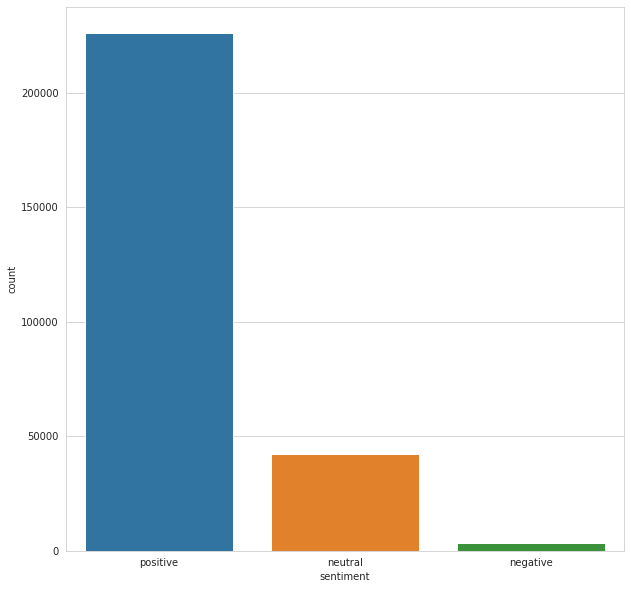

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="sentiment", data=reviews_details_ams)